In [ ]:
### This file is for generating a synthetic NMR dataset from linear combinations of experimental data, using data processed with fft, phase, reference deconvolution, baseline_smooth.  



In [1]:
## Import dependencies

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import nmrglue as ng
from keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization
import csv
import seaborn as sns
import time
from sklearn.model_selection import train_test_split


## This code for making matplotlib plots display a specific size.
plt.rcParams["figure.figsize"] = (30,15)


## Define a function for RMSE between two arrays 

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Load dataset (lipid reference standard spectra and DMSO2-only spectra) and subtract DMSO2-only spectra from each lipid spectra.

In [2]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lw_new")



## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic3,data3 = ng.pipe.read('DL8_Trilinolein_3_PROTON-3-3.fid')
dic4,data4 = ng.pipe.read('DL8_Trilinolein_4_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic6,data6 = ng.pipe.read('DL_PE_10_PROTON_16scan-2.fid')
dic7,data7 = ng.pipe.read('DL7_DipalmitoylPE_PROTON-2-3.fid')
dic8,data8 = ng.pipe.read('DL7_DipalmitoylPE_2_rescan_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic10,data10 = ng.pipe.read('DL8_TriDHA_4_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic12,data12 = ng.pipe.read('DL_LipMix5_PC_10_PROTON-1-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic14,data14 = ng.pipe.read('DL8_EPAm_4_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic16,data16 = ng.pipe.read('DL8_Sphingomyelin_4_PROTON-2-3.fid')
dic17,data17 = ng.pipe.read('DL9_Sphingomyelin_PROTON-2-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic19,data19 = ng.pipe.read('DL7_Triolein_2_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic21,data21 = ng.pipe.read('DL7_LPC_PROTON-2-3.fid')
dic22,data22 = ng.pipe.read('DL7_LPC_2_PROTON-2-3.fid')
dic23,data23 = ng.pipe.read('DL7_Tripalmitin_2_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic25,data25 = ng.pipe.read('DL_LipMix6_CholArachidonate_PROTON-2-3.fid')
dic26,data26 = ng.pipe.read('DL7_CholArachidonate_2_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic29,data29 = ng.pipe.read('DL7_DimyristoylPE_2_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic31,data31 = ng.pipe.read('DL7_CholLinoleate_PROTON-2-3.fid')
dic32,data32 = ng.pipe.read('DL_Cholesterol_10_PROTON_16scan-2.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic34,data34 = ng.pipe.read('DL9_DioleoylPC_2_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')
dic36,data36 = ng.pipe.read('DL_PalmiticAcid_10_PROTON_16scan-3.fid')
dic37,data37 = ng.pipe.read('DL_LipMix2_PalmiticAcid_10_new_PROTON-2-3.fid')

## Fourier transform into spectra
#dic1,data1 = ng.pipe_proc.ft(dic1,data1)
#dic2,data2 = ng.pipe_proc.ft(dic2,data2)
#dic3,data3 = ng.pipe_proc.ft(dic3,data3)
#dic4,data4 = ng.pipe_proc.ft(dic4,data4)
#dic5,data5 = ng.pipe_proc.ft(dic5,data5)
#dic6,data6 = ng.pipe_proc.ft(dic6,data6)
#dic7,data7 = ng.pipe_proc.ft(dic7,data7)
#dic8,data8 = ng.pipe_proc.ft(dic8,data8)
#dic9,data9 = ng.pipe_proc.ft(dic9,data9)
#dic10,data10 = ng.pipe_proc.ft(dic10,data10)
#dic11,data11 = ng.pipe_proc.ft(dic11,data11)
#dic12,data12 = ng.pipe_proc.ft(dic12,data12)
#dic13,data13 = ng.pipe_proc.ft(dic13,data13)
#dic14,data14 = ng.pipe_proc.ft(dic14,data14)
#dic15,data15 = ng.pipe_proc.ft(dic15,data15)
#dic16,data16 = ng.pipe_proc.ft(dic16,data16)
#dic17,data17 = ng.pipe_proc.ft(dic17,data17)
#dic18,data18 = ng.pipe_proc.ft(dic18,data18)
#dic19,data19 = ng.pipe_proc.ft(dic19,data19)
#dic20,data20 = ng.pipe_proc.ft(dic20,data20)
#dic21,data21 = ng.pipe_proc.ft(dic21,data21)
#dic22,data22 = ng.pipe_proc.ft(dic22,data22)
#dic23,data23 = ng.pipe_proc.ft(dic23,data23)
#dic24,data24 = ng.pipe_proc.ft(dic24,data24)
#dic25,data25 = ng.pipe_proc.ft(dic25,data25)
#dic26,data26 = ng.pipe_proc.ft(dic26,data26)
#dic27,data27 = ng.pipe_proc.ft(dic27,data27)
#dic28,data28 = ng.pipe_proc.ft(dic28,data28)
#dic29,data29 = ng.pipe_proc.ft(dic29,data29)
#dic30,data30 = ng.pipe_proc.ft(dic30,data30)
#dic31,data31 = ng.pipe_proc.ft(dic31,data31)
#dic32,data32 = ng.pipe_proc.ft(dic32,data32)
#dic33,data33 = ng.pipe_proc.ft(dic33,data33)
#dic34,data34 = ng.pipe_proc.ft(dic34,data34)
#dic35,data35 = ng.pipe_proc.ft(dic35,data35)
#dic36,data36 = ng.pipe_proc.ft(dic36,data36)
#dic37,data37 = ng.pipe_proc.ft(dic37,data37)

## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data3 = data3 - data1
data4 = data4 - data1
data5 = data5 - data1
data6 = data6 - data1
data7 = data7 - data1
data8 = data8 - data1
data9 = data9 - data1
data10 = data10 - data1
data11 = data11 - data1
data12 = data12 - data1
data13 = data13 - data1
data14 = data14 - data1
data15 = data15 - data1
data16 = data16 - data1
data17 = data17 - data1
data18 = data18 - data1
data19 = data19 - data1
data20 = data20 - data1
data21 = data21 - data1
data22 = data22 - data1
data23 = data23 - data1
data24 = data24 - data1
data25 = data25 - data1
data26 = data26 - data1
data27 = data27 - data1
data28 = data28 - data1
data29 = data29 - data1
data30 = data30 - data1
data31 = data31 - data1
data32 = data32 - data1
data33 = data33 - data1
data34 = data34 - data1
data35 = data35 - data1
data36 = data36 - data1
data37 = data37 - data1



## Switch directories to get lipid profile information, read with pandas, make into numpy array, then (for no reason really) make a variable for each lipid profile.
os.chdir("/home/htjhnson/Downloads/DL_NMR")
LipidProfiles = pd.read_excel('All_DL_Standards-LipidProfiles.xlsx', index_col=0)

LipidProf = np.array(LipidProfiles)

dataprof2 = LipidProf[0]
dataprof3 = LipidProf[1]
dataprof4 = LipidProf[2]
dataprof5 = LipidProf[3]
dataprof6 = LipidProf[4]
dataprof7 = LipidProf[5]
dataprof8 = LipidProf[6]
dataprof9 = LipidProf[7]
dataprof10 = LipidProf[8]
dataprof11 = LipidProf[9]
dataprof12 = LipidProf[10]
dataprof13 = LipidProf[11]
dataprof14 = LipidProf[12]
dataprof15 = LipidProf[13]
dataprof16 = LipidProf[14]
dataprof17 = LipidProf[15]
dataprof18 = LipidProf[16]
dataprof19 = LipidProf[17]
dataprof20 = LipidProf[18]
dataprof21 = LipidProf[19]
dataprof22 = LipidProf[20]
dataprof23 = LipidProf[21]
dataprof24 = LipidProf[22]
dataprof25 = LipidProf[23]
dataprof26 = LipidProf[24]
dataprof27 = LipidProf[25]
dataprof28 = LipidProf[26]
dataprof29 = LipidProf[27]
dataprof30 = LipidProf[28]
dataprof31 = LipidProf[29]
dataprof32 = LipidProf[30]
dataprof33 = LipidProf[31]
dataprof34 = LipidProf[32]
dataprof35 = LipidProf[33]
dataprof36 = LipidProf[34]
dataprof37 = LipidProf[35]


LipList5 = ['Tg','TC','TPL','TFA','PUFA','MUFA','SFA','Om3','Om6','Om9','LA','DHA','PC','PE','FC','EC','LPC',"SM"]

## Also load in 11 experimental lipid mixture spectra

In [3]:
## Switch directories, take only real data, reshape, and make an array of all mixture spectra. Also load lipid profile data for mixtures.
## A bunch of functions which should be changed to loops, or just one loop probably.

#
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lw")


#
Tdic1,Tdata1 = ng.pipe.read('DL_LipMix4_1_PROTON-2-3.fid')
Tdic2,Tdata2 = ng.pipe.read('DL_LipMix4_2_PROTON-2-3.fid')
Tdic3,Tdata3 = ng.pipe.read('DL_LipMix4_3_PROTON-3-3.fid')
Tdic4,Tdata4 = ng.pipe.read('DL_LipMix5_1_PROTON-3-3.fid')
Tdic5,Tdata5 = ng.pipe.read('DL_LipMix5_2_PROTON-3-3.fid')
Tdic6,Tdata6 = ng.pipe.read('DL_LipMix5_3_PROTON-3-3.fid')
Tdic9,Tdata9 = ng.pipe.read('DL_LipMix_7-3_PROTON-1-3.fid')
Tdic10,Tdata10 = ng.pipe.read('DL_LipMix_8-1_PROTON-2-3.fid')
Tdic12,Tdata12 = ng.pipe.read('DL_LipMixture_1_PROTON-2-3.fid')
Tdic13,Tdata13 = ng.pipe.read('DL_LipMixture_2_PROTON-2-3.fid')
Tdic14,Tdata14 = ng.pipe.read('DL_LipMixture_3_PROTON-2-3.fid')


#
test1 = Tdata1.real
test2 = Tdata2.real
test3 = Tdata3.real
test4 = Tdata4.real
test5 = Tdata5.real
test6 = Tdata6.real
test9 = Tdata9.real
test10 = Tdata10.real
test12 = Tdata12.real
test13 = Tdata13.real
test14 = Tdata14.real

#
test = [test1,test2,test3,test4,test5,test6,test9,test10,test12,test13,test14]
test = np.array(test)
test = test[:,14000:28000]
#test = test/OvMax

    

##
os.chdir("/home/htjhnson/Downloads/DL_NMR")
TestLipProfiles = pd.read_excel('DL_LipMix_LipidProfiles_More.xlsx', index_col=0)

TestLipProfiles = np.array(TestLipProfiles)
## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
TestLipProfiles = np.array(TestLipProfiles)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)

In [4]:
## Add 5 more mixtures for a total of 16

#
#os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/16_Mixtures/FFTPhaseRefdBasec_Smooth")


#
#Tdic20,Tdata20 = ng.pipe.read('DL_LipMixture_2-1_PROTON-2-3.fid')
#Tdic21,Tdata21 = ng.pipe.read('DL_LipMixture_2-2_PROTON-2-3.fid')
#Tdic22,Tdata22 = ng.pipe.read('DL_LipMixture_2-3_PROTON-2-3.fid')
#Tdic23,Tdata23 = ng.pipe.read('DL_LipMixture_3-1_PROTON-2-3.fid')
#Tdic24,Tdata24 = ng.pipe.read('DL_LipMixture_3-2_PROTON-2-3.fid')


# Only keep real part of complex data
#test20 = Tdata20.real
#test21 = Tdata21.real
#test22 = Tdata22.real
#test23 = Tdata23.real
#test24 = Tdata24.real


# Create an array with all experimental lipid spectra and keep only lipid signal region
#test = [test1,test2,test3,test4,test5,test6,test9,test10,test12,test13,test14,test20,test21,test22]
#test = np.array(test)
#test = test[:,14000:28000]


# Change directory
#os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/16_Mixtures")
## Read excel file of lipid concentrations
#TestLipProfiles = pd.read_excel('DL_LipMix_LipidProfiles_16mixtures.xlsx', index_col=0)

#TestLipProfiles = np.array(TestLipProfiles)
## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
#TestLipProfiles = np.array(TestLipProfiles)
#TestLipProfiles = np.delete(TestLipProfiles,7, 1)
#TestLipProfiles = np.delete(TestLipProfiles,7, 1)
#TestLipProfiles = np.delete(TestLipProfiles,7, 1)
#TestLipProfiles = np.delete(TestLipProfiles,7, 1)
#TestLipProfiles = np.delete(TestLipProfiles,-1, 0)
#TestLipProfiles = np.delete(TestLipProfiles,-1, 0)

## Generate a dataset using linear combinations of lipid standards, then adding back DMSO2-only spectra

In [5]:
## None left out, all 34 reference scans, try different scalars (0.1-3)
## Use seeds for reproducibility


spec = []
conc = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 55000

## Generate data using all 34 FIDs every time
for i in range(iterations):

    #next three trilin.
    random.seed(i+0)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+1)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+3)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+4)
    x4_int2 = 0
    random.seed(i+5)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    
    #Next 4 dipalmPE
    random.seed(i+6)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+7)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+8)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+9)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2

    random.seed(i+10)
    x7_int2 = 0
    random.seed(i+11)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+12)
    x8_int2 = 0
    random.seed(i+13)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+14)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+15)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+16)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+17)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    
    #Next two dipalmPC
    random.seed(i+18)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+19)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+20)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+22)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+23)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+24)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+26)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+28)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+30)
    x17_int2 = 0
    random.seed(i+31)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+32)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+34)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+36)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+38)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+40)
    x22_int2 = 0
    random.seed(i+41)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+42)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+44)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+46)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+48)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+50)
    x27_int2 = 0
    random.seed(i+51)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+52)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+54)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2

    #next two cholesteryl linoleate
    random.seed(i+56)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+58)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+60)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+62)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+64)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+66)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+68)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+70)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
 
    xdata = data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37

    
    #dic1,xdata = ng.process.pipe_proc.ft(dic1,xdata)
    dic1,xdata = ng.process.pipe_proc.di(dic1,xdata)
    xdata = xdata[14000:28000]
    
    spec.append(xdata)
    conc.append(ydata)
    
    
## Determine max value in entire dataset, and use this value to normalize dataset intensities.
OvMaxL = []
for i in spec:
    OvMaxL.append(np.max(i))
OvMax = np.max(OvMaxL)
print(OvMax)

spec = spec/OvMax


## Use the max value to also scale the experimental mixture spectra
test = test/OvMax


## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc = np.array(conc)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)

93144.54


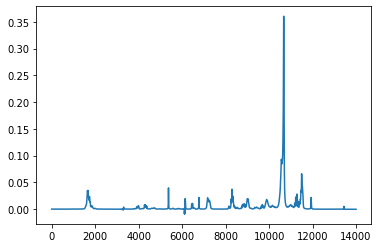

In [6]:
plt.plot(spec[0])

In [15]:
#plt.plot(ng.proc_base(spec[0]))

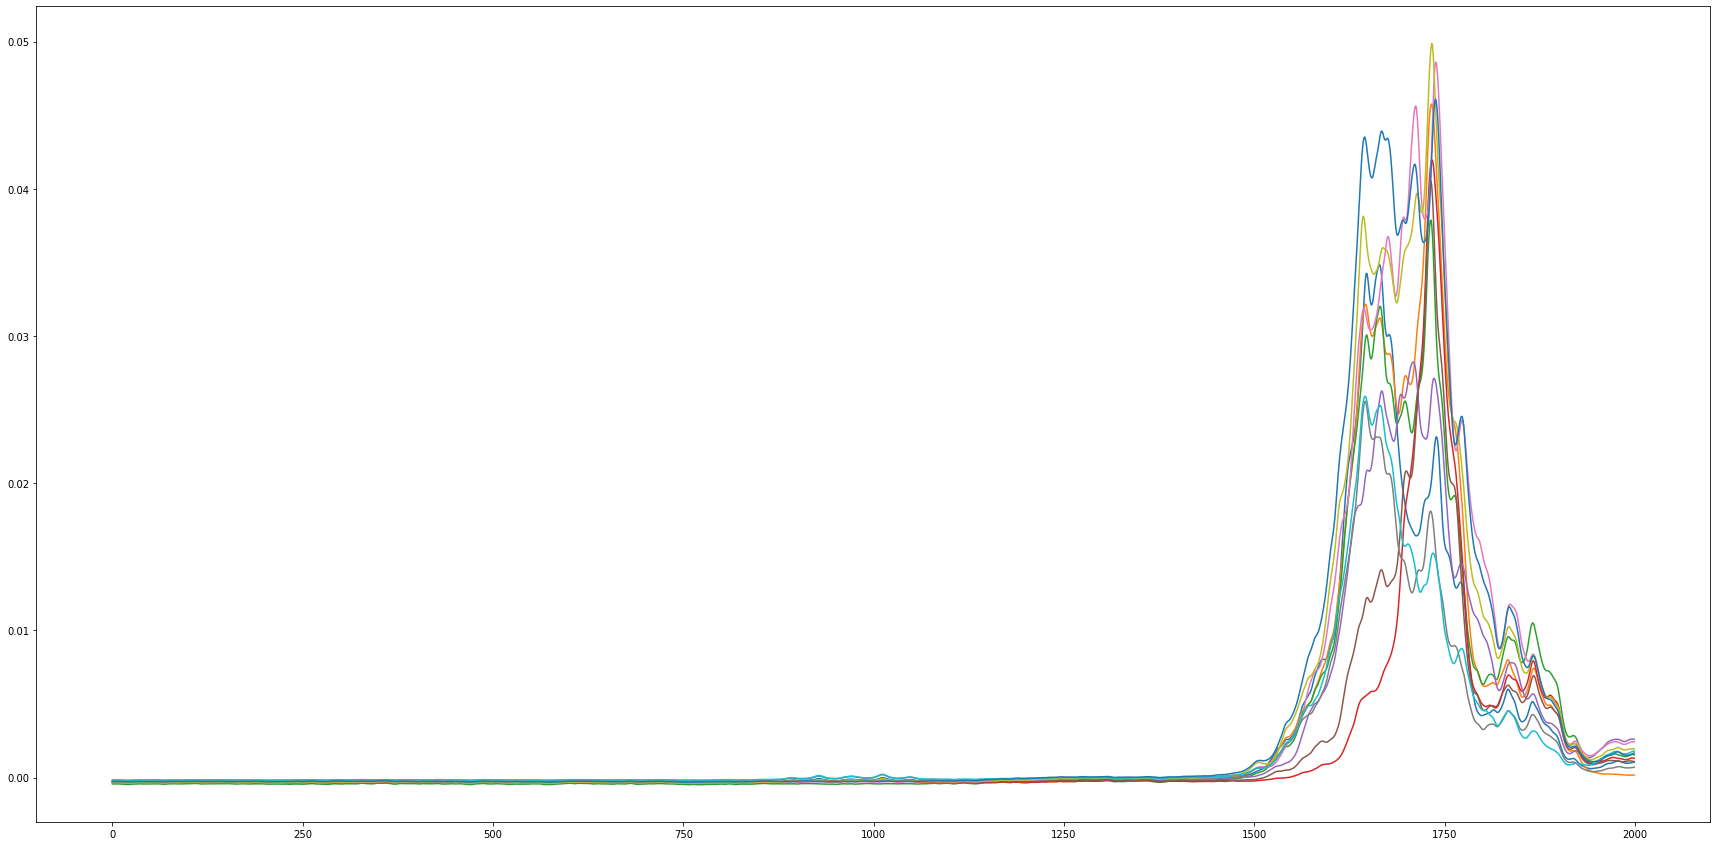

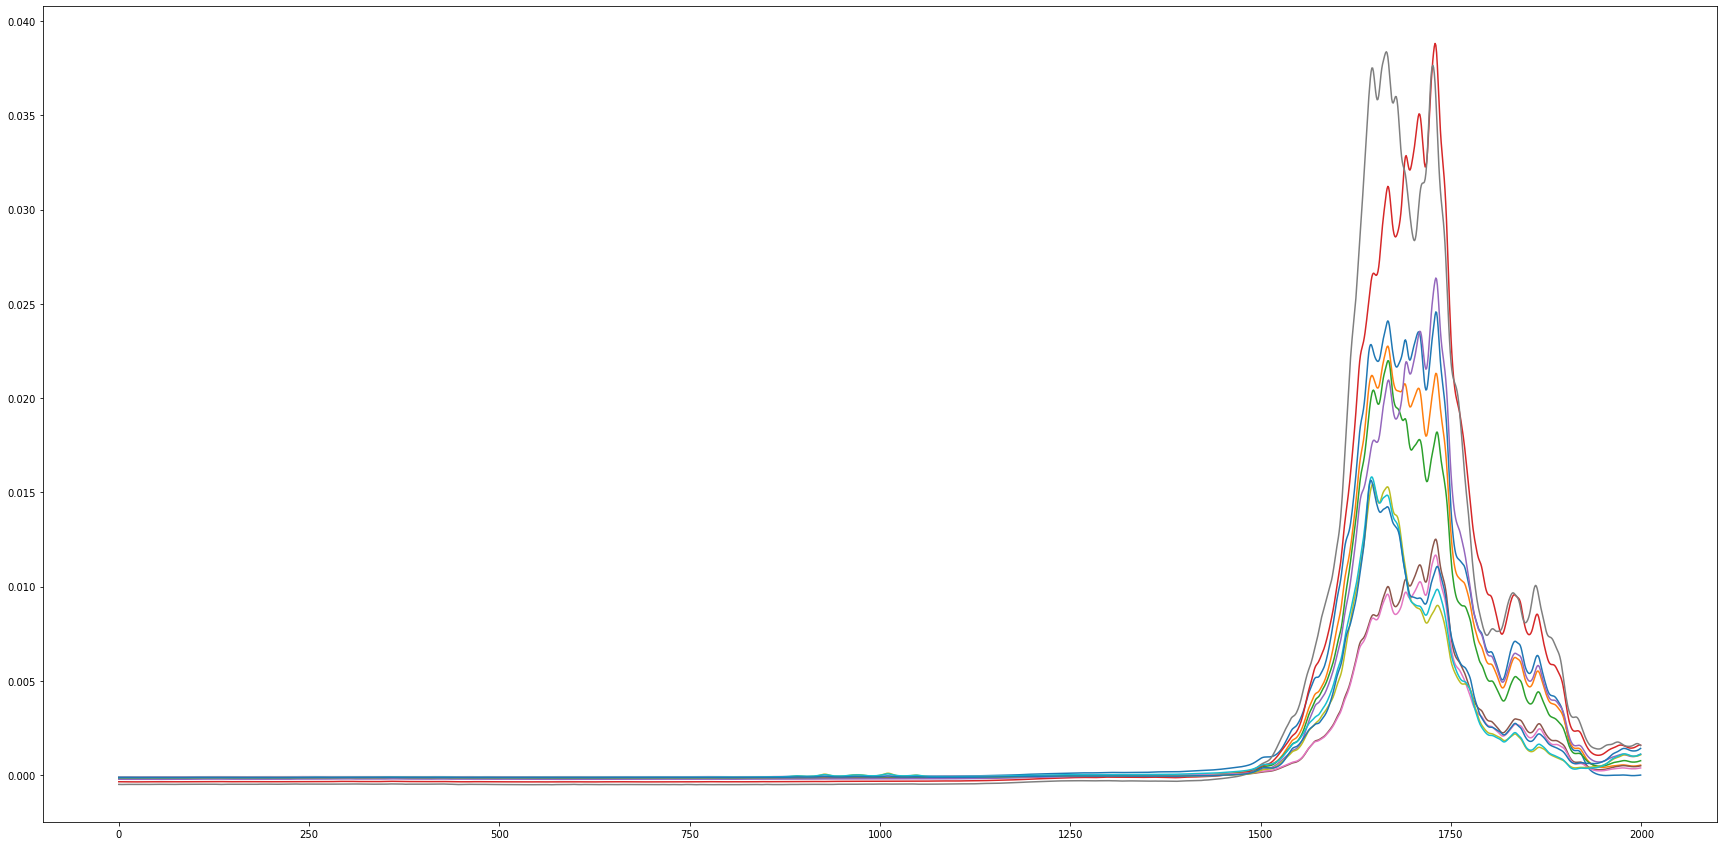

In [16]:
for i in np.arange(11):
    plt.plot(spec[i][:2000])
plt.show()
for i in np.arange(11):
    plt.plot(test[i][:2000])

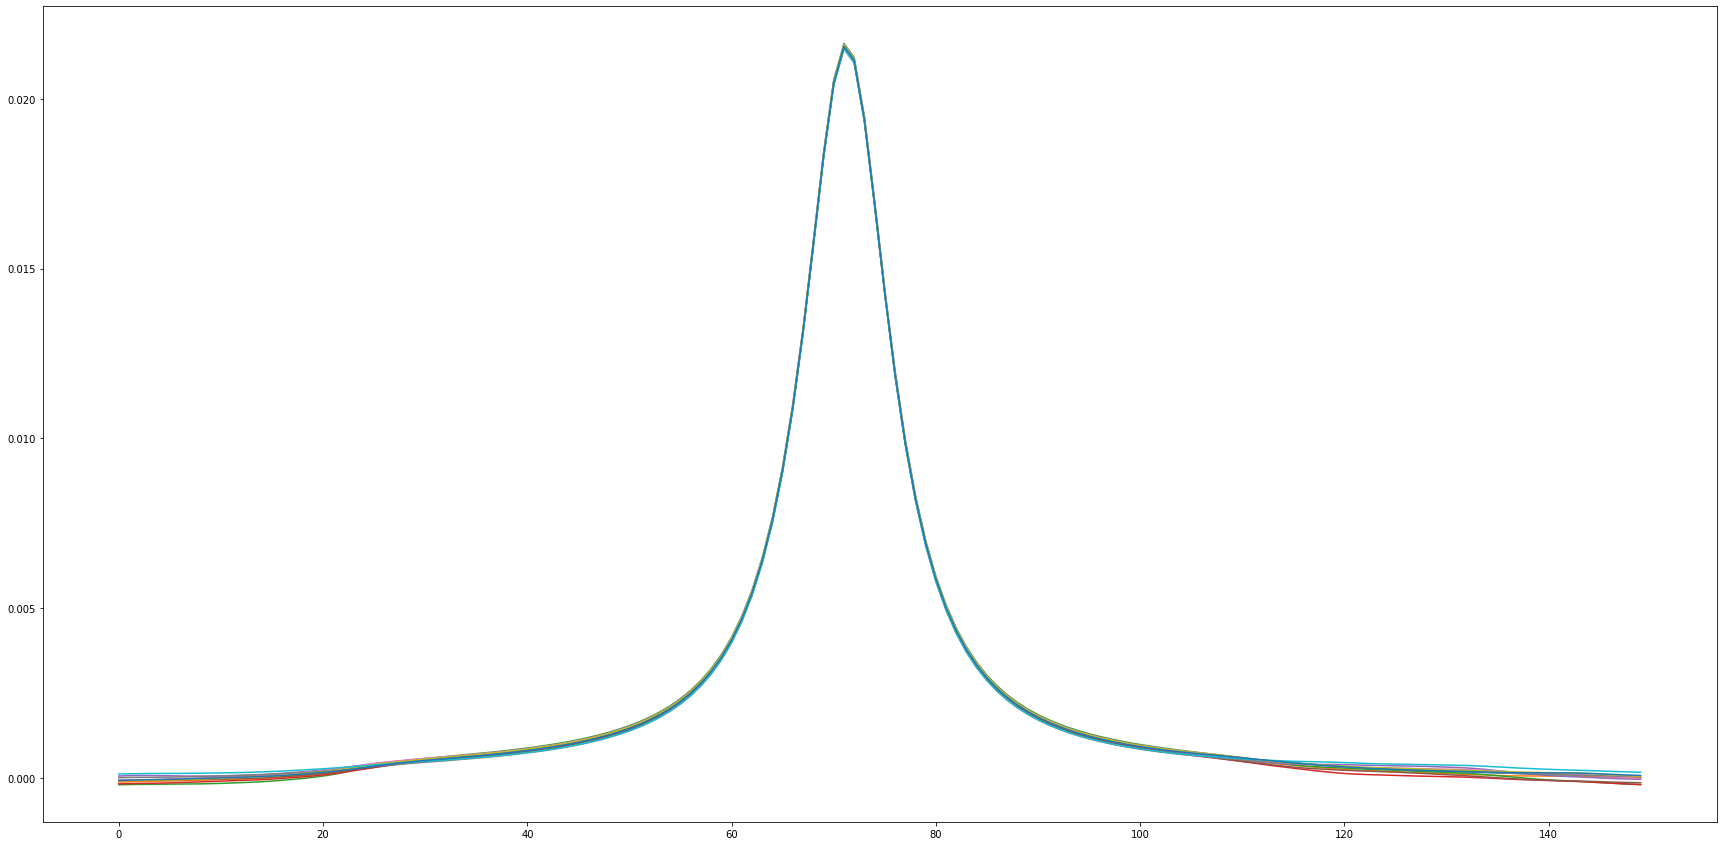

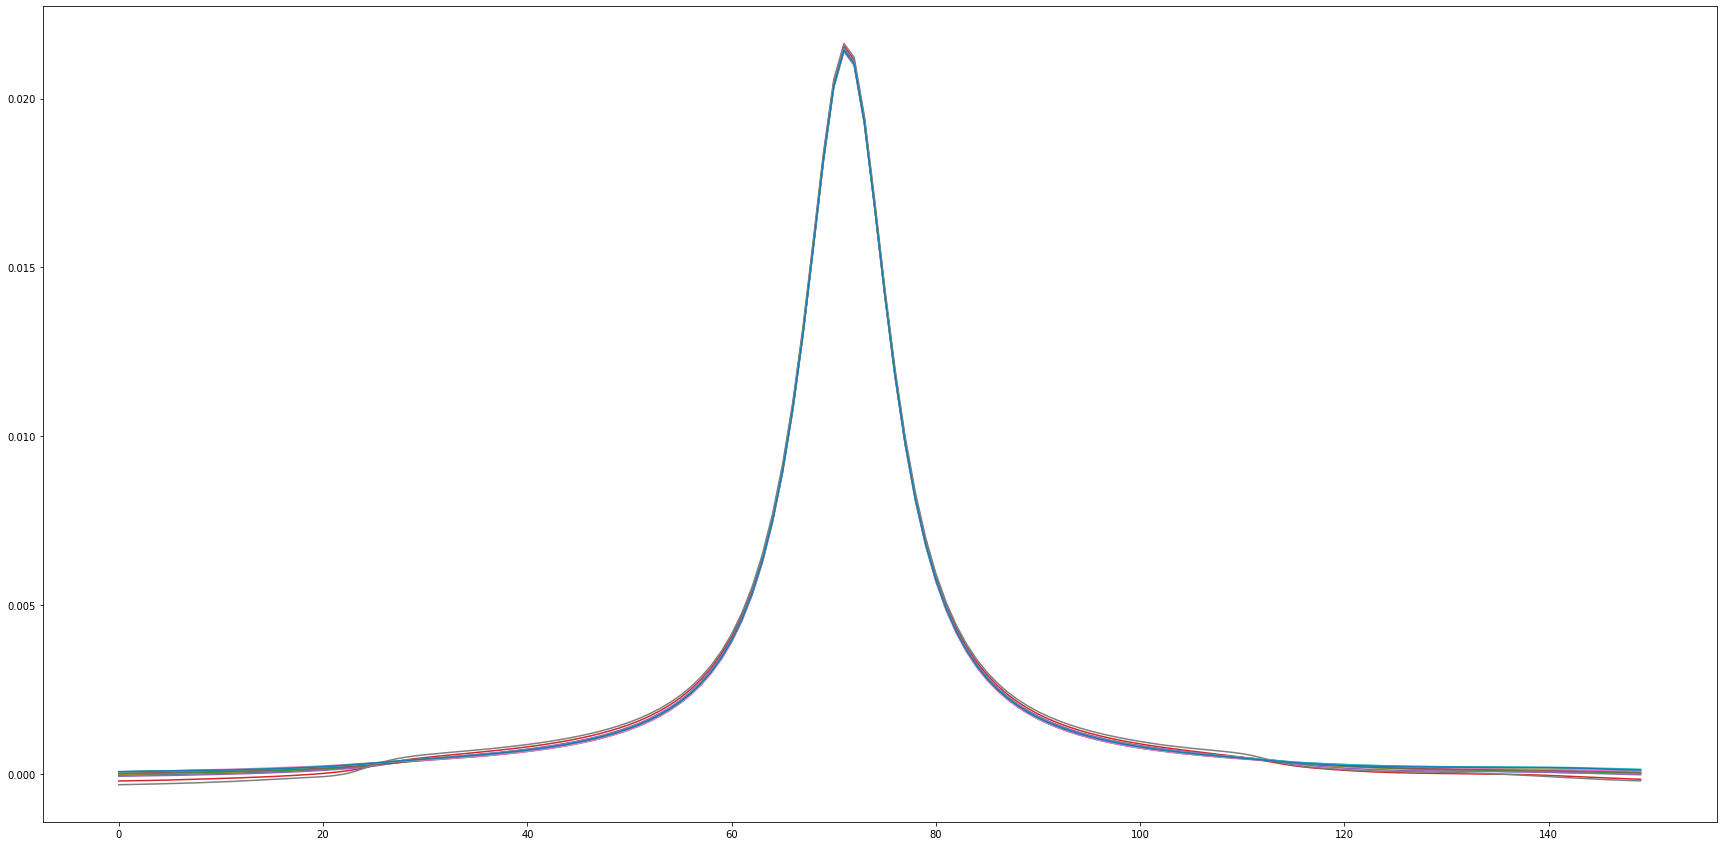

In [17]:
for i in np.arange(11):
    plt.plot(spec[i][6700:6850])
plt.show()
for i in np.arange(11):
    plt.plot(test[i][6700:6850])

In [18]:
for i in np.arange(18):
    print(conc[:,i].max())

73.35068314352917
19.20974374983131
19.601054922895628
244.51005574585565
99.63103242417961
104.35300766848093
97.15955360328903
24.38851704982408
86.27452733854405
104.35300766848093
83.50442090886364
12.567776879909069
12.238088543817403
7.943817586206262
9.69532556017024
12.046283601997079
2.0357076196443584
2.7823047916954184


In [7]:
## Scale the target concentrations to be in the range of 0-1
conc_s = conc.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc_s[:,i].max()
    print(conc_s[:,i].max())
    
## Also scale experimental mixture data 
TestLipProfiles_s = TestLipProfiles.copy()
for i in np.arange(18):
    TestLipProfiles_s[:,i]  = TestLipProfiles_s[:,i]/conc[:,i].max()

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [8]:
## Split dataset into testing and training sets, and reshape for network training

xtrain, xtest, ytrain, ytest = train_test_split(spec[:50000], conc_s[:50000], test_size=0.2)

xtrain = np.squeeze(xtrain)
xtest = np.squeeze(xtest)
ytrain = np.squeeze(ytrain)
ytest = np.squeeze(ytest)

#xtrain = np.squeeze(xtrain)
#xtest = np.squeeze(xtest)

In [9]:
## Create MLP architecture and training parameters/metrics definition

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(layers.Dense(200, input_dim=14000, kernel_initializer='he_uniform', activation='relu'))
#    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(18))
    model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [22]:
## Create the first MLP model definition and model.
start = time.time()

model = get_model(14000,18)
model.summary()

history = model.fit(xtrain, ytrain, batch_size=128, epochs=100,
validation_data=(xtest, ytest))

end = time.time()
print(end - start)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2800200   
                                                                 
 dense_1 (Dense)             (None, 18)                3618      
                                                                 
Total params: 2,803,818
Trainable params: 2,803,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0583
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 5.2406e-04 - root_mea

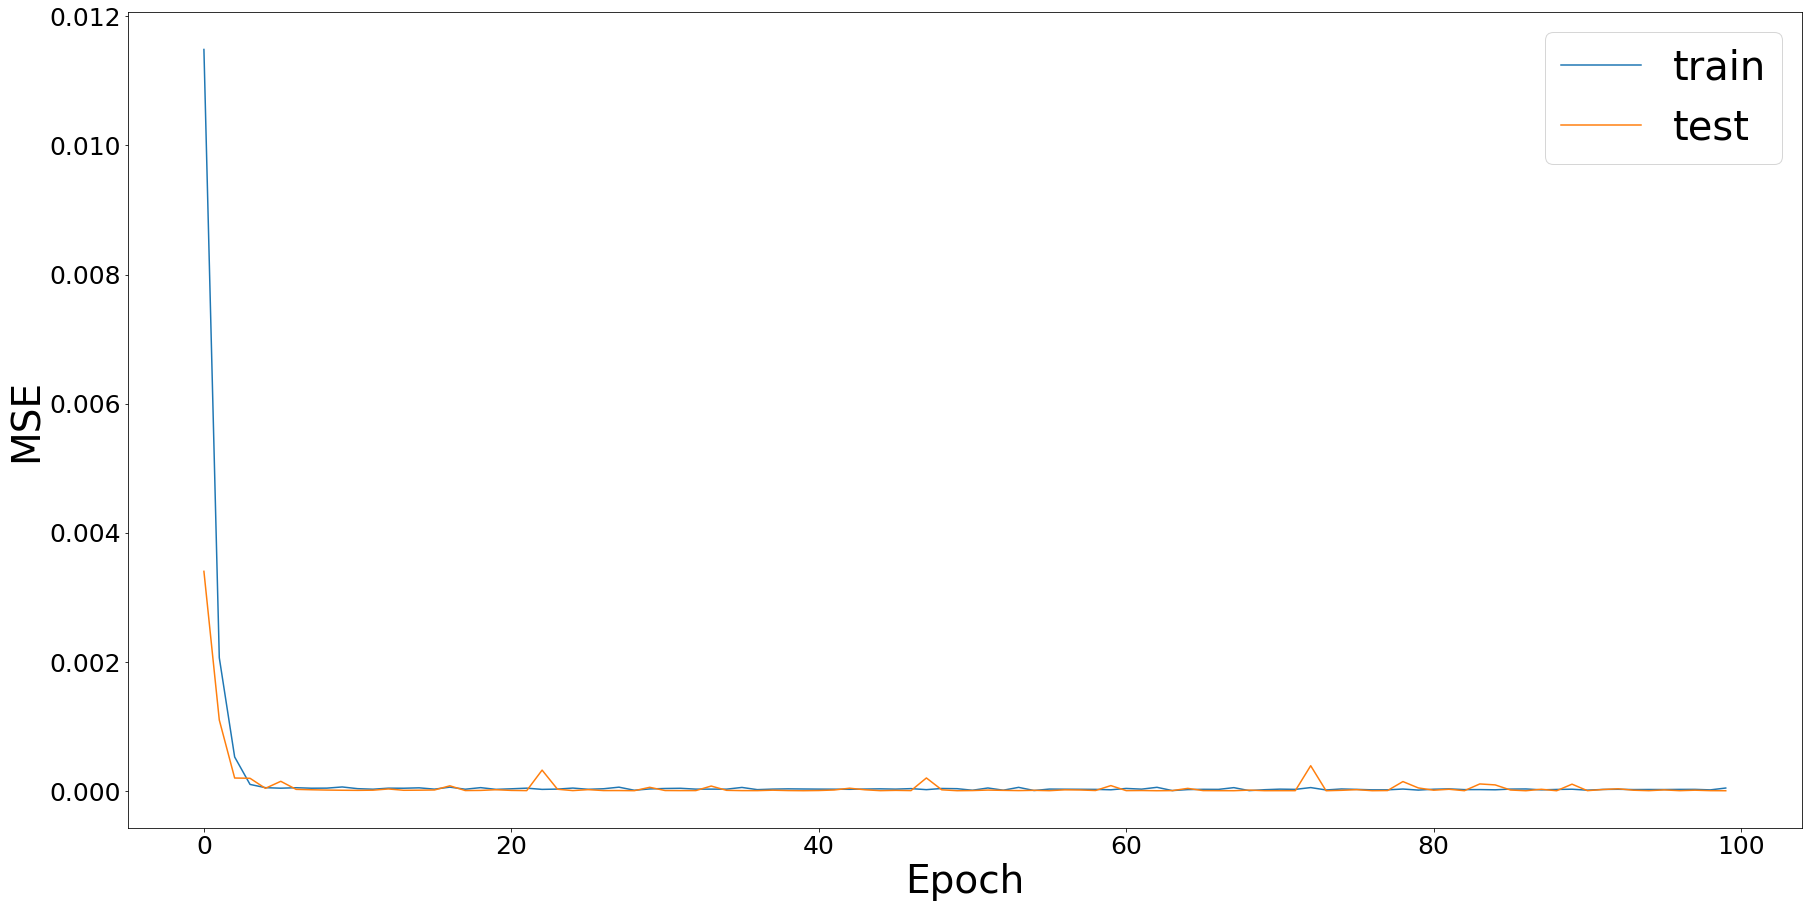

In [23]:
#os.chdir("/home/htjhnson/Downloads")

# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('MSE')
plt.ylabel('MSE', fontsize=39)
plt.xlabel('Epoch', fontsize=39)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(['train', 'test'], loc='upper right', fontsize=40)
plt.rcParams["figure.figsize"] = (12,10)
#plt.savefig('Loss.svg')
#plt.savefig('Loss.png')


plt.show()

In [10]:
## Save trained model weights (Run this function once, then comment out and only run data loading function.)

#model.save_weights('./checkpoints/MLP_FftPhaRef2pt4lw_LinearCombinations_TwoEach_OutputScaled_50000ep')


## Load trained model
model = get_model(14000,18)

# Restore the weights
model.load_weights('./checkpoints/MLP_FftPhaRef2pt4lw_LinearCombinations_TwoEach_OutputScaled_50000ep')

In [25]:
## Time model on quantification of 5000 spectra
start = time.time()
ypred = model.predict(np.squeeze(spec[50000:]))
end = time.time()
print(end - start)

157/157 [==============================] - 0s 2ms/step
0.3938755989074707


In [170]:
ypred = model.predict(np.squeeze(spec[50000:]))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()


rmse = np.sqrt(((ypred - conc[50000:]) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data")   

157/157 [==============================] - 1s 5ms/step
Tg 0.13
TC 0.01
TPL 0.01
TFA 0.99
PUFA 0.21
MUFA 0.29
SFA 0.07
Om3 0.05
Om6 0.04
Om9 0.07
LA 0.19
DHA 0.02
PC 0.02
PE 0.05
FC 0.04
EC 0.05
LPC 0.01
SM 0.02
Overall RMSE:  0.126
For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data


In [171]:
ypred = model.predict(np.squeeze(spec[50000:]))

rmse = np.sqrt(((ypred - conc_s[50000:]) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(4))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(4))
print("For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data")   

157/157 [==============================] - 1s 4ms/step
Tg 0.0018
TC 0.0006
TPL 0.0006
TFA 0.004
PUFA 0.0021
MUFA 0.0028
SFA 0.0007
Om3 0.0019
Om6 0.0005
Om9 0.0007
LA 0.0022
DHA 0.0014
PC 0.0017
PE 0.006
FC 0.0043
EC 0.0043
LPC 0.0061
SM 0.0059
Overall RMSE:  0.0026
For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data


In [172]:
#test = test/112211.9
np.shape(ypred[:10])

(10, 18)

In [173]:
ypred = model.predict((test))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    
rmse = np.sqrt(((ypred - TestLipProfiles) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_50000ep experimental mixtures")

1/1 [==============================] - 0s 50ms/step
Tg 0.47
TC 0.27
TPL 0.24
TFA 2.53
PUFA 0.96
MUFA 2.23
SFA 2.36
Om3 0.79
Om6 0.73
Om9 2.4
LA 0.66
DHA 0.37
PC 0.67
PE 0.48
FC 0.85
EC 0.97
LPC 0.46
SM 0.19
Overall RMSE:  0.98
For MLP_FftPhaRefBas_LinearCombinations_50000ep experimental mixtures


In [174]:
ypred = model.predict((test))


rmse = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(4))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(4))
print("For MLP_FftPhaRefBas_LinearCombinations_50000ep experimental mixtures")

1/1 [==============================] - 0s 58ms/step
Tg 0.0065
TC 0.0138
TPL 0.0122
TFA 0.0104
PUFA 0.0097
MUFA 0.0214
SFA 0.0243
Om3 0.0324
Om6 0.0084
Om9 0.023
LA 0.0079
DHA 0.0296
PC 0.055
PE 0.0601
FC 0.0874
EC 0.0808
LPC 0.2244
SM 0.0691
Overall RMSE:  0.0431
For MLP_FftPhaRefBas_LinearCombinations_50000ep experimental mixtures


In [175]:
## Mean percent error for first 16 lipid groups
mpe1 = (abs(TestLipProfiles_s[:,:16] - ypred[:,:16])/TestLipProfiles_s[:,:16]).mean(axis=0)*100

## Mean percent error for last 2 lipid groups (separated as they are only in included in the last three experimental spectra)
mpe2 = (abs(TestLipProfiles_s[8:11,16:] - ypred[8:11,16:])/TestLipProfiles_s[8:11,16:]).mean(axis=0)*100

## Join all 18 lipids into the same list and print mean percent error for each lipid group quantified
mpe_all = np.concatenate((np.array(mpe1),np.array(mpe2)),axis=0)
for i in np.arange(18):
    print(LipList5[i],mpe_all[i].round(2))
    
mape = mpe_all.mean()
print(mape)

Tg 2.59
TC 5.47
TPL 3.86
TFA 3.93
PUFA 2.87
MUFA 7.38
SFA 7.71
Om3 7.68
Om6 2.58
Om9 9.46
LA 5.5
DHA 6.32
PC 32.77
PE 10.85
FC 28.96
EC 29.32
LPC 25.1
SM 40.62
12.942291091224556


In [176]:
for i in np.arange(18):
    print(LipList5[i],ypred[0,i],TestLipProfiles[0,i])

Tg 0.29196435 22.35417289
TC 0.07152259 1.357326245
TPL 0.05971506 1.281982745
TFA 0.28032413 71.56503082924351
PUFA 0.311462 30.29539931233264
MUFA 0.13170338 15.260268084082881
SFA 0.24342021 26.009363432827993
Om3 0.308649 6.73308223
Om6 0.2767721 23.56231708
Om9 0.13357261 15.26026808
LA 0.2738421 23.16029658
DHA 0.46021473 5.560059385
PC -0.009655836 0.55916761
PE 0.094637744 0.722815135
FC 0.033471137 0.6907358614174597
EC 0.089977905 1.279945128726704
LPC 0.27476555 0.0
SM -0.0040011164 0.0


In [177]:
for i in np.arange(18):
    print(LipList5[i],ypred[2,i],TestLipProfiles[2,i])

Tg 0.18005288 13.41250374
TC 0.18486245 4.071978736
TPL 0.18320534 3.845948235
TFA 0.21049875 53.74504765412059
PUFA 0.22813596 22.829751568415006
MUFA 0.096549295 10.419668493597355
SFA 0.19342887 20.49562759210822
Om3 0.28224164 6.855104164
Om6 0.18598999 15.9746474
Om9 0.0983797 10.41966849
LA 0.17838778 14.7685859
DHA 0.2762918 3.336035631
PC 0.11483801 1.67750283
PE 0.26545638 2.168445405
FC 0.13560176 2.2567468148102585
EC 0.18556741 3.089764224664566
LPC 0.050387472 0.0
SM -0.014259008 0.0


In [178]:
for i in np.arange(18):
    print(LipList5[i],ypred[4,i],TestLipProfiles[4,i])

Tg 0.24910706 18.41419082
TC 0.22760269 4.457084737
TPL 0.27505055 5.082893863
TFA 0.28474095 69.91183767313697
PUFA 0.26352364 24.957927786570398
MUFA 0.19041702 19.937157922061644
SFA 0.24136052 25.016751964504927
Om3 0.20507848 4.432888789
Om6 0.2506148 20.525039
Om9 0.1928293 19.93715792
LA 0.2410083 19.21532064
DHA 0.18770017 2.168768506
PC 0.22027662 2.917355615
PE 0.30747247 2.165538248
FC 0.18411838 2.657239672467813
EC 0.21453753 1.6271972828519523
LPC 0.1272923 0.0
SM -0.009582422 0.0


In [179]:
for i in np.arange(18):
    print(LipList5[i],ypred[6,i],TestLipProfiles[6,i])

Tg 0.10585942 8.58
TC 0.09009773 1.89
TPL 0.10545761 2.11
TFA 0.11946013 32.3584959178659
PUFA 0.11418107 11.852311650728899
MUFA 0.08461355 10.260742765214566
SFA 0.09461754 10.245441501922432
Om3 0.10339374 2.52
Om6 0.10361192 9.34
Om9 0.085820764 10.26
LA 0.101387605 8.79
DHA 0.0906823 1.17
PC 0.07870179 1.123180876
PE 0.12748739 0.988107007
FC 0.06648092 0.833179405716256
EC 0.09043834 1.0545663970520818
LPC 0.05246596 0.0
SM -0.0030457163 0.0


In [180]:
for i in np.arange(18):
    print(LipList5[i],ypred[7,i],TestLipProfiles[7,i])

Tg 0.42608982 31.29
TC 0.71638227 13.53
TPL 0.41448855 7.52
TFA 0.5296576 124.18062155656422
PUFA 0.22010045 20.661252254842733
MUFA 0.45880118 40.9344343511421
SFA 0.5909256 62.58493495057937
Om3 0.6004333 12.56
Om6 0.094724104 8.1
Om9 0.46394444 40.93
LA 0.05095178 3.44
DHA 0.51591045 5.39
PC 0.3419549 5.12
PE 0.35314506 2.4
FC 0.3732864 5.424855615895182
EC 0.84281456 8.101939130557582
LPC 0.4959375 0.0
SM 0.0344197 0.0


In [181]:
for i in np.arange(18):
    print(LipList5[i],ypred[8,i],TestLipProfiles[8,i])

Tg 0.048244484 3.5840080937723475
TC 0.27697068 5.7739614139843285
TPL 0.43982682 8.471118519375084
TFA 0.14097318 36.29267797962623
PUFA 0.11152378 11.132119282780426
MUFA 0.043314077 4.2926766471242725
SFA 0.19522223 19.5973006543727
Om3 0.22487669 5.321264538143604
Om6 0.06447646 5.810854744636822
Om9 0.045791913 3.9921090052137953
LA 0.057806835 4.509190801686295
DHA 0.22490044 2.6936933668585716
PC 0.22554408 1.7615641002537366
PE 0.35824856 3.4551342730915593
FC 0.24371794 2.6649488344600836
EC 0.2467708 3.1090125795242445
LPC 0.6402761 1.9838387506809514
SM 0.63099116 1.2705813953488372


In [182]:
for i in np.arange(18):
    print(LipList5[i],ypred[9,i],TestLipProfiles[9,i])

Tg 0.06530096 4.77867745836313
TC 0.27989274 5.625940165629608
TPL 0.42437714 8.219041390609679
TFA 0.14551014 36.506392929348095
PUFA 0.11448595 11.018436543167715
MUFA 0.055795282 5.5231904348920455
SFA 0.1899727 19.11771168772244
Om3 0.23798983 5.34330527000145
Om6 0.06535064 5.675131273166267
Om9 0.05775092 5.322812006951727
LA 0.061144687 4.807355311199249
DHA 0.29980242 3.591591155811429
PC 0.2652663 2.348752133671649
PE 0.36145505 3.700675826251504
FC 0.33370876 3.553265112613445
EC 0.17876019 2.072675053016163
LPC 0.50504035 1.3225591671206343
SM 0.43279645 0.8470542635658915


In [183]:
for i in np.arange(18):
    print(LipList5[i],ypred[10,i],TestLipProfiles[10,i])

Tg 0.08079651 5.9733468229539115
TC 0.27293876 5.477918917274888
TPL 0.41199455 7.966964261844273
TFA 0.14694998 36.72010787906996
PUFA 0.111954525 10.904753803555007
MUFA 0.071573325 6.753704222659818
SFA 0.1797114 18.638122721072186
Om3 0.22425446 5.365346001859296
Om6 0.06664567 5.5394078016957105
Om9 0.07329103 6.653515008689658
LA 0.06476673 5.1055198207122015
DHA 0.36387742 4.489488944764286
PC 0.33160555 2.9359401670895613
PE 0.3625416 3.9462173794114497
FC 0.422673 4.441581390766806
EC 0.09430322 1.0363375265080814
LPC 0.2640054 0.6612795835603171
SM 0.21542338 0.42352713178294576


## Repeat MLP analysis with just 10000 spectra, instead of 50000 as above

In [184]:
## Split dataset into testing and training sets, and reshape for network training

spec2 = spec[:10000]
conc2 = conc_s[:10000]

xtrain, xtest, ytrain, ytest = train_test_split(spec2, conc2, test_size=0.2)

xtrain = np.squeeze(xtrain)
xtest = np.squeeze(xtest)
ytrain = np.squeeze(ytrain)
ytest = np.squeeze(ytest)

#xtrain = np.squeeze(xtrain)
#xtest = np.squeeze(xtest)

In [185]:
## Create the first MLP model definition and model.
start = time.time()

model2 = get_model(14000,18)
model2.summary()

history2 = model2.fit(xtrain, ytrain, batch_size=128, epochs=100,
validation_data=(xtest, ytest))

end = time.time()
print(end - start)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               2800200   
                                                                 
 dense_9 (Dense)             (None, 18)                3618      
                                                                 
Total params: 2,803,818
Trainable params: 2,803,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 20ms/step - loss: 0.0273 - root_mean_squared_error: 0.1652 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1147
Epoch 2/100
63/63 [==============================] - 1s 17ms/step - loss: 0.0101 - root_mean_squared_error: 0.1004 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0905
Epoch 3/100
63/63 [==============================] - 1s 17ms/step - loss: 0.0067 - root_mean_squ

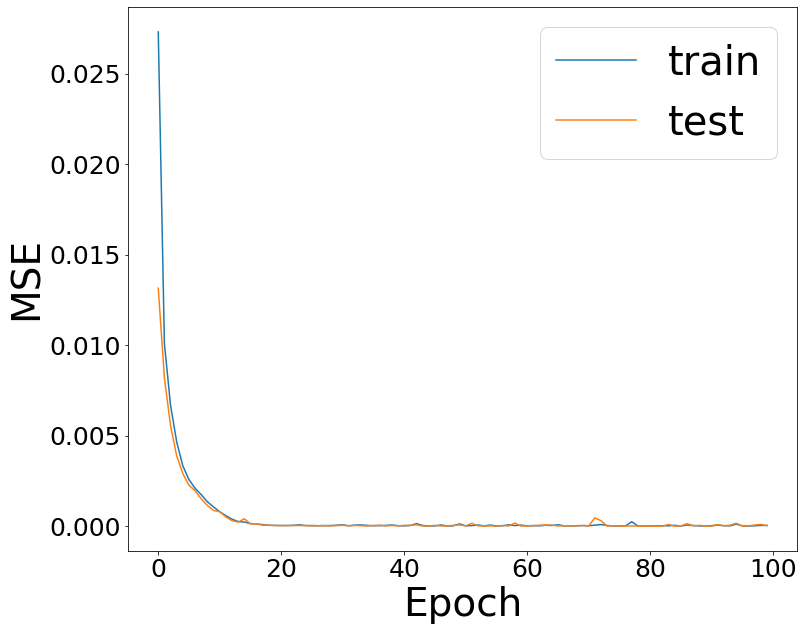

In [186]:
#os.chdir("/home/htjhnson/Downloads")

# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
#plt.title('MSE')
plt.ylabel('MSE', fontsize=39)
plt.xlabel('Epoch', fontsize=39)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(['train', 'test'], loc='upper right', fontsize=40)
plt.rcParams["figure.figsize"] = (12,10)
#plt.savefig('Loss.svg')
#plt.savefig('Loss.png')


plt.show()

In [187]:
## Save trained model weights (Run this function once, then comment out and only run data loading function.)

model2.save_weights('./checkpoints/MLP_FftPhaRef2pt4lw_LinearCombinations_TwoEach_OutputScaled_10000ep')


## Load trained model
model2 = get_model(14000,18)

# Restore the weights
model2.load_weights('./checkpoints/MLP_FftPhaRef2pt4lw_LinearCombinations_TwoEach_OutputScaled_10000ep')

In [188]:
ypred = model2.predict(np.squeeze(spec[50000:]))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()

rmse = np.sqrt(((ypred - conc[50000:]) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_10000ep synthetic data")   

157/157 [==============================] - 1s 3ms/step
Tg 0.17
TC 0.02
TPL 0.08
TFA 0.4
PUFA 0.33
MUFA 0.1
SFA 0.21
Om3 0.05
Om6 0.14
Om9 0.18
LA 0.28
DHA 0.02
PC 0.04
PE 0.03
FC 0.09
EC 0.1
LPC 0.03
SM 0.01
Overall RMSE:  0.127
For MLP_FftPhaRefBas_LinearCombinations_10000ep synthetic data


In [189]:
ypred = model2.predict(np.squeeze(spec[50000:]))


rmse = np.sqrt(((ypred - conc_s[50000:]) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(4))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(4))
print("For MLP_FftPhaRefBas_LinearCombinations_10000ep synthetic data")   

157/157 [==============================] - 0s 3ms/step
Tg 0.0024
TC 0.001
TPL 0.0039
TFA 0.0016
PUFA 0.0033
MUFA 0.001
SFA 0.0021
Om3 0.0022
Om6 0.0017
Om9 0.0018
LA 0.0033
DHA 0.0014
PC 0.0036
PE 0.0032
FC 0.0092
EC 0.0085
LPC 0.0145
SM 0.0036
Overall RMSE:  0.0038
For MLP_FftPhaRefBas_LinearCombinations_10000ep synthetic data


In [190]:
ypred = model2.predict((test))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
rmse = np.sqrt(((ypred - TestLipProfiles) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_10000ep experimental mixtures")

1/1 [==============================] - 0s 32ms/step
Tg 0.45
TC 0.26
TPL 0.33
TFA 2.23
PUFA 0.72
MUFA 2.05
SFA 2.41
Om3 0.61
Om6 0.6
Om9 2.35
LA 0.6
DHA 0.39
PC 0.62
PE 0.48
FC 0.75
EC 0.92
LPC 0.47
SM 0.2
Overall RMSE:  0.914
For MLP_FftPhaRefBas_LinearCombinations_10000ep experimental mixtures


In [191]:
ypred = model2.predict((test))
    
rmse = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(4))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(4))
print("For MLP_FftPhaRefBas_LinearCombinations_10000ep experimental mixtures")

1/1 [==============================] - 0s 34ms/step
Tg 0.0061
TC 0.0133
TPL 0.017
TFA 0.0091
PUFA 0.0072
MUFA 0.0197
SFA 0.0248
Om3 0.0249
Om6 0.0069
Om9 0.0225
LA 0.0072
DHA 0.0307
PC 0.051
PE 0.0604
FC 0.0776
EC 0.0766
LPC 0.2315
SM 0.0712
Overall RMSE:  0.0421
For MLP_FftPhaRefBas_LinearCombinations_10000ep experimental mixtures


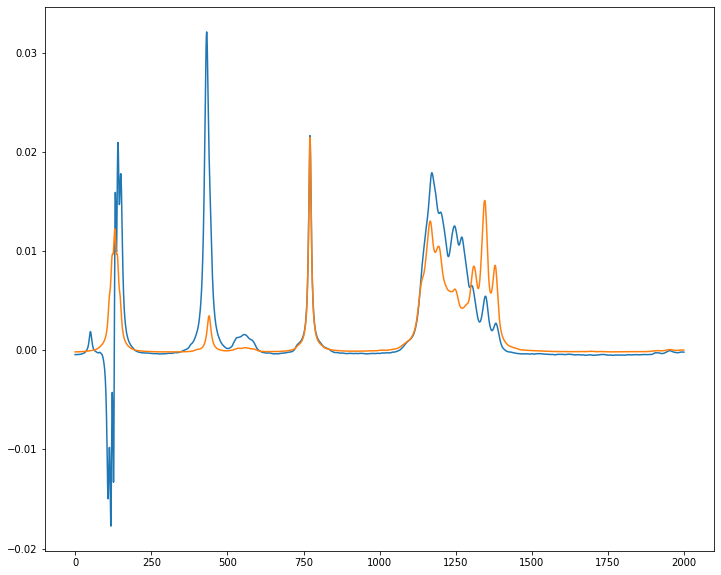

In [192]:
plt.plot(spec[2,6000:8000])
plt.plot(test[0,6000:8000])


## Check if Adding common interference signals messes with quantification of lipid metabolites.

In [193]:
#test = test/

In [194]:
## Load Liver Data

os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lw_new")




testFiles = ['NGR_Liver_Lipids_1__proton-1-3.fid', 'NGR_Liver_Lipid_2_PROTON-1-3.fid', 'NGR_Liver_Lipids_3__proton-1-3.fid', 'NGR_Liver_Lipid_4_second__proton-1-3.fid','NGR_Liver_Lipid_5__PROTON-4-3.fid', 'NGR_Liver_Lipids_17__proton-1-3.fid','NGR_Liver_Lipids_18_PROTON-1-3.fid','NGR_Liver_Lipid_19_PROTON-1-3.fid','NGR_Liver_Lipid_21_second_half__proton-1-3.fid','NGR_Liver_Lipids_22_proton-1-3.fid','NGR_Liver_Lipids_23_PROTON-1-3.fid','NGR_Liver_Lipid_24_4th_half__proton-1-3.fid','NGR_Liver_25_Lipids___proton-1-3.fid','NGR_Liver_Lipids_36_PROTON-1-3.fid','NGR_Liver_Lipids_37_PROTON-2-3.fid','NGR_Liver_Lipids_39__proton-1-3.fid']
        
testFlist = []
for i in testFiles:
    testFlist.append(i[4:19])
    
testFlist = testFlist[:32]

LiverDic = []
LiverData = []
for i in range(len(testFlist)):
    globals()[testFlist[i]+ '_' + 'Dic'],globals()[testFlist[i]+ '_' + 'Data'] = ng.pipe.read(testFiles[i])
    LiverDic.append(globals()[testFlist[i]+ '_' + 'Dic'])
    LiverData.append(globals()[testFlist[i]+ '_' + 'Data'])
    
    
#for i in np.arange(16):
#    LiverDic[i],LiverData[i] = ng.process.pipe_proc.ft(LiverDic[i],LiverData[i])
    
for i in np.arange(16):
    LiverData[i] = LiverData[i].real
    
for i in np.arange(16):
    LiverData[i] = np.reshape(LiverData[i], (32768,1))
    
#for i in np.arange(16):
#    LiverData[i] = LiverData[i]/OvMax
    
    
    
os.chdir("/home/htjhnson/Downloads/DL_NMR")
LiverCRAFT1 = pd.read_excel('Liver_AdLib_AllData_half_reodered_adj.xlsx', index_col=0)
LipListCRAFT = ['Tg','TC','TFA','PUFA','MUFA','SFA','UFA','Om3','LA','PC','PE','SM','PUFAp','MUFAp','SFAp']

LiverData = np.array(LiverData)[:,14000:28000]
LiverData = LiverData/OvMax

## First with TMS

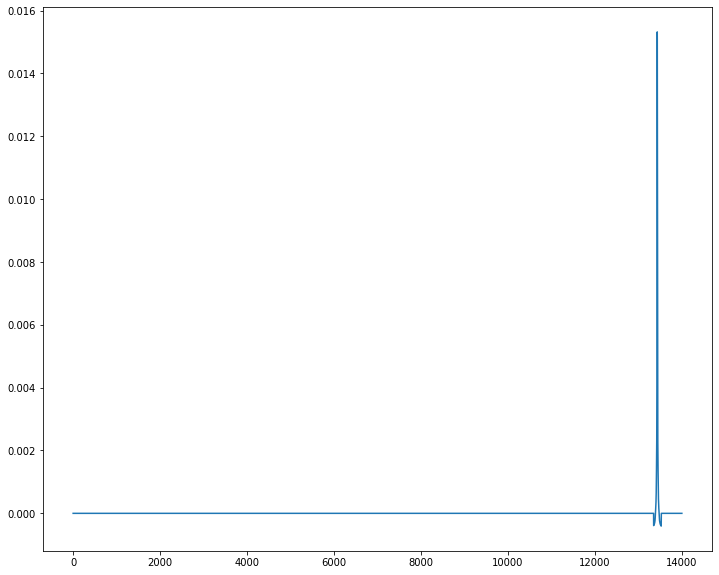

In [256]:
# Isolate TMS signal from one hepatic spectra
TMS = LiverData[1].copy()
TMS[:13350] = np.zeros([13350,1])
TMS[13525:] = np.zeros([475,1])
TMS = np.reshape(TMS,[14000])
plt.plot(TMS)

# Add TMS signal to each experimental lipid mixture
test_TMS = test.copy()
for i in np.arange(11):
    TMS[13350:13525] = TMS[13350:13525] - (TMS[13350:13525].min() - test[i][:1000].mean())
    test_TMS[i] = test_TMS[i] + TMS

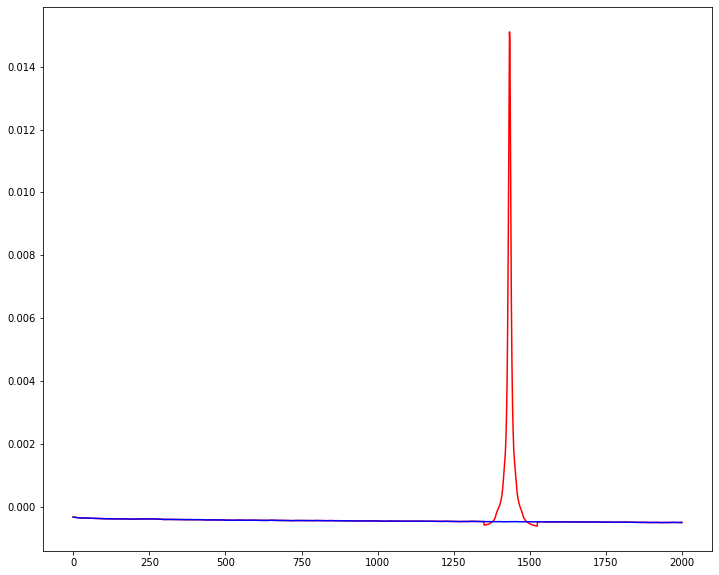

In [257]:
## Check if signal has been added

plt.plot(test_TMS[0][12000:],color='r')
plt.plot(test[0][12000:],color='b')

In [258]:
## Predict concentrations for experimental dataset with and without TMS added

ypred = model.predict(test)
ypred_TMS = model.predict(test_TMS)

1/1 [==============================] - 0s 67ms/step


In [259]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_TMS[0][i])

Tg 0.29196435 0.29430357
TC 0.07152259 0.068074584
TPL 0.05971506 0.06552468
TFA 0.28032413 0.28059465
PUFA 0.311462 0.31248266
MUFA 0.13170338 0.13200888
SFA 0.24342021 0.24397099
Om3 0.308649 0.31130403
Om6 0.2767721 0.27665365
Om9 0.13357261 0.13436748
LA 0.2738421 0.27357963
DHA 0.46021473 0.4613935
PC -0.009655836 -0.004533701
PE 0.094637744 0.11039749
FC 0.033471137 0.013849057
EC 0.089977905 0.10017916
LPC 0.27476555 0.22669102
SM -0.0040011164 -0.0010828804


In [260]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_TMS[1][i])

Tg 0.23300442 0.23535645
TC 0.12822321 0.124845564
TPL 0.12595816 0.13177557
TFA 0.24369416 0.24398553
PUFA 0.26677302 0.26781034
MUFA 0.11583736 0.11614946
SFA 0.21460745 0.21519542
Om3 0.28844422 0.29109108
Om6 0.22965826 0.22954862
Om9 0.11765443 0.118449986
LA 0.22477065 0.2245315
DHA 0.36383867 0.36503786
PC 0.06819336 0.07340407
PE 0.18438822 0.20011635
FC 0.084164165 0.064592026
EC 0.13821171 0.14848623
LPC 0.09317114 0.044863753
SM -0.011440155 -0.008587136


## Now with MTBE

In [266]:
# Isolate MTBE signal from one hepatic spectra
MTBE = LiverData[6].copy()

MTBE[:6355] = np.zeros([6355,1])
MTBE[6385:10775] = np.zeros([10775-6385,1])
MTBE[10800:] = np.zeros([3200,1])

MTBE = np.reshape(MTBE,[14000])


# Add MTBE signal to each experimental lipid mixture
test_MTBE = test.copy()
for i in np.arange(11):
    MTBE[6355:6385] = MTBE[6355:6385] - (MTBE[6355:6385].min() - test[i][:1000].mean())
    MTBE[10775:10800] = MTBE[10775:10800] - (MTBE[10775:10800].min() - test[i][:1000].mean())
    test_MTBE[i] = test_MTBE[i] + MTBE*2

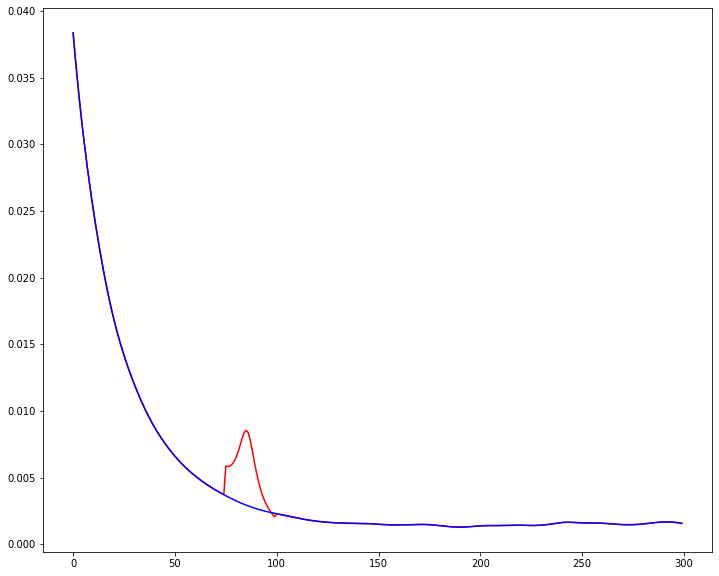

In [267]:
## Check if signal has been added

plt.plot(test_MTBE[0][10700:11000],color='r')
plt.plot(test[0][10700:11000],color='b')

In [202]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_MTBE = model.predict(test_MTBE)

1/1 [==============================] - 0s 35ms/step


In [203]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_MTBE[0][i])

Tg 0.29196435 0.2917361
TC 0.07152259 0.07245585
TPL 0.05971506 0.067216635
TFA 0.28032413 0.28095165
PUFA 0.311462 0.3110245
MUFA 0.13170338 0.13288489
SFA 0.24342021 0.24489719
Om3 0.308649 0.3087169
Om6 0.2767721 0.27606717
Om9 0.13357261 0.134472
LA 0.2738421 0.27236217
DHA 0.46021473 0.46042296
PC -0.009655836 0.0077754213
PE 0.094637744 0.08597667
FC 0.033471137 0.029316004
EC 0.089977905 0.09530862
LPC 0.27476555 0.27089733
SM -0.0040011164 9.099487e-05


In [204]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_MTBE[1][i])

Tg 0.23300442 0.23277617
TC 0.12822321 0.12915646
TPL 0.12595816 0.1334597
TFA 0.24369416 0.24432155
PUFA 0.26677302 0.26633555
MUFA 0.11583736 0.11701884
SFA 0.21460745 0.21608442
Om3 0.28844422 0.28851208
Om6 0.22965826 0.22895332
Om9 0.11765443 0.11855382
LA 0.22477065 0.22329071
DHA 0.36383867 0.36404675
PC 0.06819336 0.08562462
PE 0.18438822 0.17572714
FC 0.084164165 0.08000903
EC 0.13821171 0.14354247
LPC 0.09317114 0.089302875
SM -0.011440155 -0.007348013


In [205]:
## Now with water signal two peak version

In [206]:
# Isolate Water signal from one hepatic spectra
Water = LiverData[6].copy()

Water[:2900] = np.zeros([2900,1])
Water[3700:] = np.zeros([10300,1])

Water = np.reshape(Water,[14000])


# Add water signal to each experimental lipid mixture
test_Water = test.copy()
for i in np.arange(11):
    test_Water[i] = test_Water[i] + Water

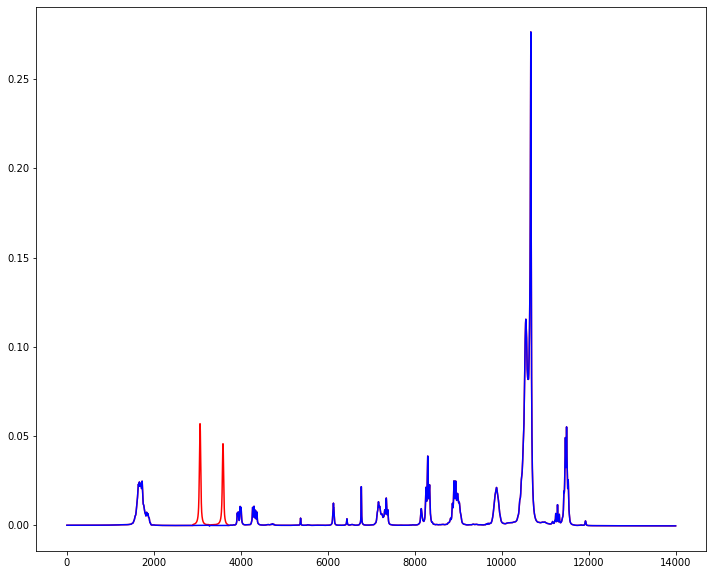

In [207]:
## Check if signal has been added

plt.plot(test_Water[0],color='r')
plt.plot(test[0],color='b')

In [208]:
## Predict concentrations for experimental dataset with and without water added

ypred = model.predict(test)
ypred_Water = model.predict(test_Water)

1/1 [==============================] - 0s 25ms/step


In [209]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_Water[0][i])
    
#print(rmse(ypred[0],ypred_Water[0]))
#print(rmse(ypred[0],TestLipProfiles[0]))

Tg 0.29196435 0.28669178
TC 0.07152259 0.029447872
TPL 0.05971506 0.083851956
TFA 0.28032413 0.26231354
PUFA 0.311462 0.25399143
MUFA 0.13170338 0.13729385
SFA 0.24342021 0.24133328
Om3 0.308649 0.19866575
Om6 0.2767721 0.2380922
Om9 0.13357261 0.15574025
LA 0.2738421 0.22032222
DHA 0.46021473 0.47199568
PC -0.009655836 -0.058924466
PE 0.094637744 0.15105385
FC 0.033471137 -0.077745214
EC 0.089977905 0.08891742
LPC 0.27476555 0.54065484
SM -0.0040011164 0.008506568


In [210]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_Water[1][i])

Tg 0.23300442 0.22743322
TC 0.12822321 0.085600734
TPL 0.12595816 0.14948048
TFA 0.24369416 0.22540984
PUFA 0.26677302 0.20907466
MUFA 0.11583736 0.12087151
SFA 0.21460745 0.21226665
Om3 0.28844422 0.1783071
Om6 0.22965826 0.19056973
Om9 0.11765443 0.13998182
LA 0.22477065 0.17159088
DHA 0.36383867 0.37547645
PC 0.06819336 0.018870885
PE 0.18438822 0.24076526
FC 0.084164165 -0.027408738
EC 0.13821171 0.13717072
LPC 0.09317114 0.35933366
SM -0.011440155 0.0010865871


## Now with the single peak water signal

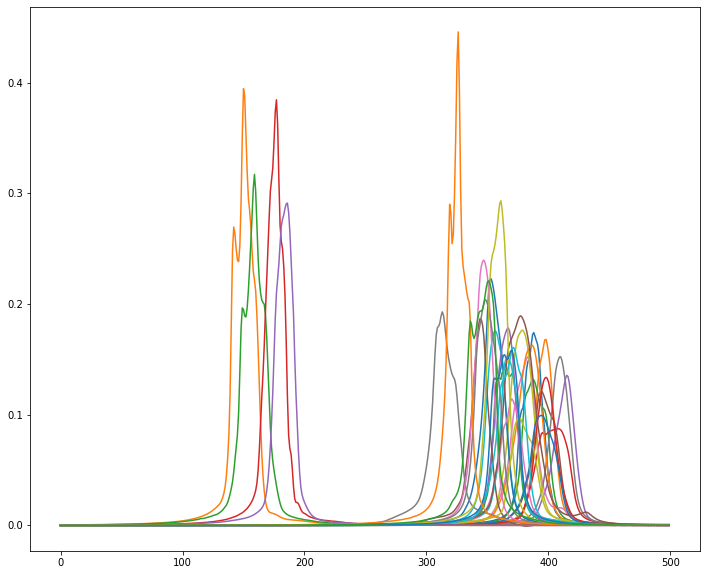

In [211]:
## Create variables for all file names of generated dataset
# Initialize some list variables
x1f = []
for filename in os.listdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/WaterSignals_FFTPhaseRefdBasec_Smooth"):
    if filename.startswith("D") == True:
        x1f.append(filename)

            
            
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/WaterSignals_FFTPhaseRefdBasec_Smooth")

# Initialize some list variables
x1 = []
x1d = []
# Read and append to list all FIDs and lipid profile values from data generation.
for i in np.arange(len(x1f)):
    xd,x = ng.pipe.read(x1f[i])
    x1d.append(xd)
    x1.append(x[14000:28000].real/OvMax)

x1 = np.array(x1)


for i in np.arange(33):
    plt.plot(x1[i][2900:3400])

In [212]:
# Isolate Water signal from one hepatic spectra
r = random.choice(np.arange(33))
wat = x1[r]

wat[:2900] = np.zeros([2900])
wat[3400:] = np.zeros([10600])

wat = np.reshape(wat,[14000])


# Add water signal to each experimental lipid mixture
test_wat = test.copy()
for i in np.arange(11):
    test_wat[i] = test_wat[i] + wat

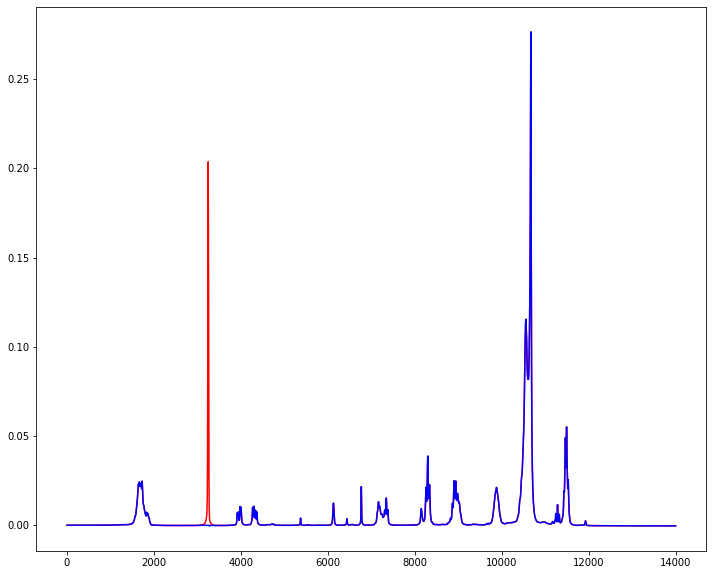

In [213]:
## Check if signal has been added

plt.plot(test_wat[0],color='r')
plt.plot(test[0],color='b')

In [214]:
## Predict concentrations for experimental dataset with and without water added

ypred = model.predict(test)
ypred_wat = model.predict(test_wat)

1/1 [==============================] - 0s 37ms/step


In [215]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_wat[0][i])

Tg 0.29196435 0.30443427
TC 0.07152259 0.063913055
TPL 0.05971506 0.012152778
TFA 0.28032413 0.28591222
PUFA 0.311462 0.32570538
MUFA 0.13170338 0.11737444
SFA 0.24342021 0.27552423
Om3 0.308649 0.31441993
Om6 0.2767721 0.28858238
Om9 0.13357261 0.11090346
LA 0.2738421 0.27487195
DHA 0.46021473 0.45462954
PC -0.009655836 -0.108628534
PE 0.094637744 0.032235444
FC 0.033471137 0.07348541
EC 0.089977905 0.04259705
LPC 0.27476555 0.32199606
SM -0.0040011164 0.185346


In [216]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_wat[1][i])

Tg 0.23300442 0.24289191
TC 0.12822321 0.11562836
TPL 0.12595816 0.06931502
TFA 0.24369416 0.2524319
PUFA 0.26677302 0.2761078
MUFA 0.11583736 0.09325636
SFA 0.21460745 0.24792802
Om3 0.28844422 0.29553473
Om6 0.22965826 0.24078704
Om9 0.11765443 0.0912945
LA 0.22477065 0.2296505
DHA 0.36383867 0.36052164
PC 0.06819336 -0.03437972
PE 0.18438822 0.12026401
FC 0.084164165 0.120718285
EC 0.13821171 0.08648227
LPC 0.09317114 0.14366162
SM -0.011440155 0.17424536


## Now without EPAm peak ~3.63 ppm

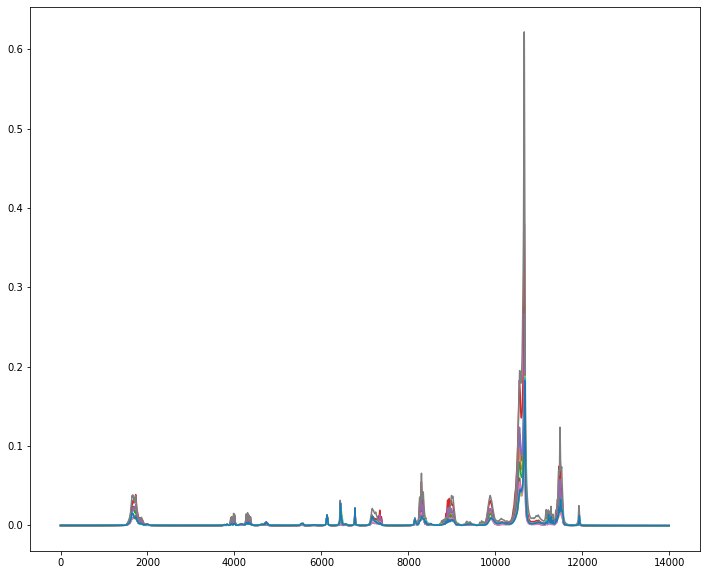

In [217]:

# Add MTBE signal to each experimental lipid mixture
NoEPAm = test.copy()

for i in np.arange(11):
    NoEPAm[i][5325:5425] = NoEPAm[i][:100]
    plt.plot(NoEPAm[i])
    
#NoEPAm = np.reshape(NoEPAm,[14000])


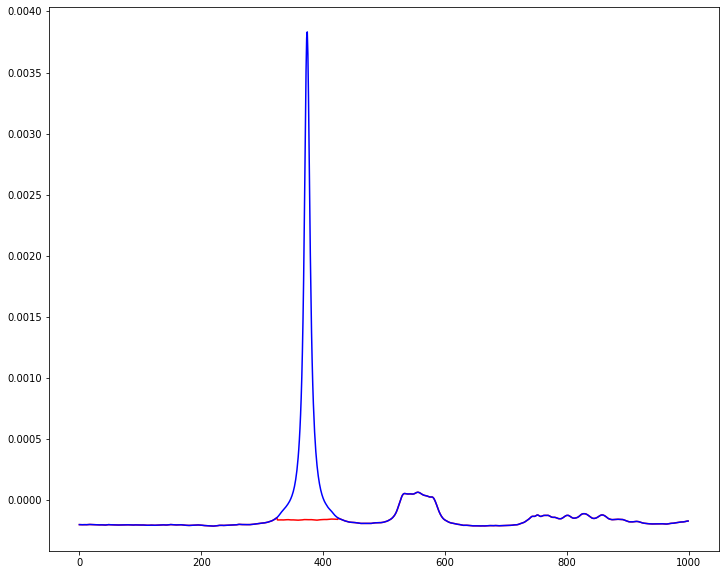

In [218]:
## Check if signal has been deleted

plt.plot(NoEPAm[0][5000:6000],color='r')
plt.plot(test[0][5000:6000],color='b')

In [219]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_NoEPAm = model.predict(NoEPAm)

1/1 [==============================] - 0s 37ms/step


In [220]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_NoEPAm[0][i])

Tg 0.29196435 0.29340896
TC 0.07152259 0.07202212
TPL 0.05971506 0.058883846
TFA 0.28032413 0.27938402
PUFA 0.311462 0.31079248
MUFA 0.13170338 0.13102213
SFA 0.24342021 0.24354777
Om3 0.308649 0.29347536
Om6 0.2767721 0.28004777
Om9 0.13357261 0.13324572
LA 0.2738421 0.2732499
DHA 0.46021473 0.4786627
PC -0.009655836 -0.00980492
PE 0.094637744 0.093001634
FC 0.033471137 0.03137448
EC 0.089977905 0.092676096
LPC 0.27476555 0.27093843
SM -0.0040011164 -0.002494569


In [221]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_NoEPAm[1][i])

Tg 0.23300442 0.23584545
TC 0.12822321 0.12927423
TPL 0.12595816 0.124308616
TFA 0.24369416 0.2419832
PUFA 0.26677302 0.2655702
MUFA 0.11583736 0.114532895
SFA 0.21460745 0.21489751
Om3 0.28844422 0.25857428
Om6 0.22965826 0.23623882
Om9 0.11765443 0.11695777
LA 0.22477065 0.22362909
DHA 0.36383867 0.40038195
PC 0.06819336 0.06823092
PE 0.18438822 0.18115464
FC 0.084164165 0.080031835
EC 0.13821171 0.14355968
LPC 0.09317114 0.08294718
SM -0.011440155 -0.008118949


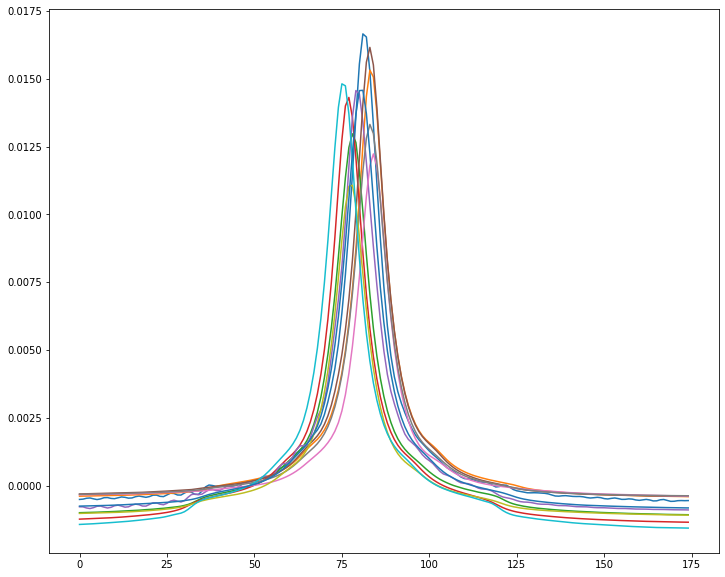

In [222]:
for i in np.arange(11):
    plt.plot(LiverData[i][13350:13525])

## Add TMS signal in different location (random signal essentially)

In [276]:
# Isolate TMS signal from one hepatic spectra
r = random.choice(np.arange(11))

TMS = LiverData[r].copy()
TMS[:13350] = np.zeros([13350,1])
TMS[13525:] = np.zeros([475,1])
TMS = np.reshape(TMS,[14000])

## Define interference signal
t = np.zeros(14000)
t[7500:7675] = TMS[13350:13525]

# Add TMS signal to each experimental lipid mixture
test_t = test.copy()
for i in np.arange(11):
    t[7500:7675] = t[7500:7675] - (t[7500:7675].min() - test[i][:1000].mean())
    test_t[i] = test_t[i]+ t

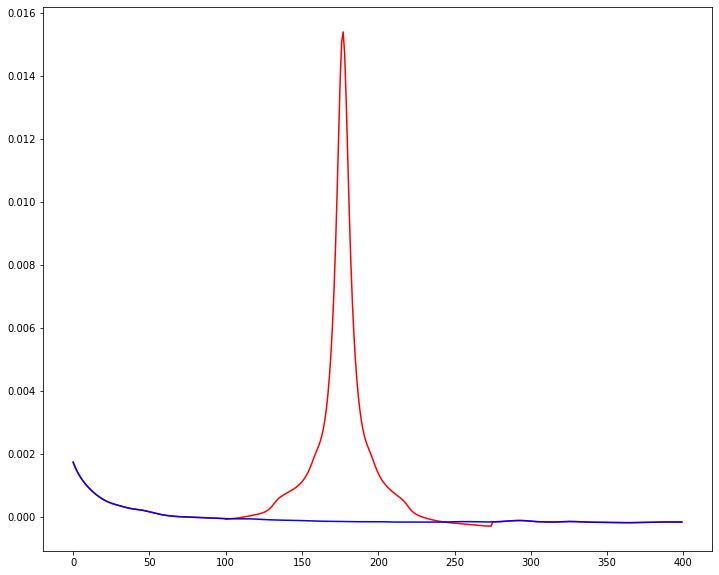

In [277]:
## Check if signal has been deleted

plt.plot(test_t[0][7400:7800],color='r')
plt.plot(test[0][7400:7800],color='b')

In [278]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_test_t = model.predict(test_t)

1/1 [==============================] - 0s 51ms/step


In [279]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_test_t[0][i])

Tg 0.29196435 0.2911131
TC 0.07152259 0.07116379
TPL 0.05971506 0.060692493
TFA 0.28032413 0.28063893
PUFA 0.311462 0.31510362
MUFA 0.13170338 0.13003615
SFA 0.24342021 0.24214867
Om3 0.308649 0.319193
Om6 0.2767721 0.27859062
Om9 0.13357261 0.13137935
LA 0.2738421 0.2749204
DHA 0.46021473 0.461186
PC -0.009655836 -0.015270707
PE 0.094637744 0.09811194
FC 0.033471137 0.02767776
EC 0.089977905 0.09487161
LPC 0.27476555 0.31459174
SM -0.0040011164 -0.005413983


In [280]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_test_t[1][i])

Tg 0.23300442 0.23216307
TC 0.12822321 0.12787397
TPL 0.12595816 0.12692742
TFA 0.24369416 0.2440094
PUFA 0.26677302 0.27034843
MUFA 0.11583736 0.11420264
SFA 0.21460745 0.21336031
Om3 0.28844422 0.29879227
Om6 0.22965826 0.23143919
Om9 0.11765443 0.11549625
LA 0.22477065 0.22581492
DHA 0.36383867 0.36479932
PC 0.06819336 0.06265987
PE 0.18438822 0.18782814
FC 0.084164165 0.0784655
EC 0.13821171 0.1430221
LPC 0.09317114 0.1324879
SM -0.011440155 -0.012846292


In [290]:
# Isolate TMS signal from one hepatic spectra to a second location in the test spectra
TMS = LiverData[1].copy()
TMS[:13350] = np.zeros([13350,1])
TMS[13525:] = np.zeros([475,1])
TMS = np.reshape(TMS,[14000])

## Define interference signal
t2 = np.zeros(14000)
t2[2200:2375] = TMS[13350:13525]

# Add TMS signal to each experimental lipid mixture
test_t2 = test.copy()
for i in np.arange(11):
    t2[2200:2375] = t2[2200:2375] - (t2[2200:2375].min() - test[i][:1000].mean())
    test_t2[i] = test_t2[i]+ t2

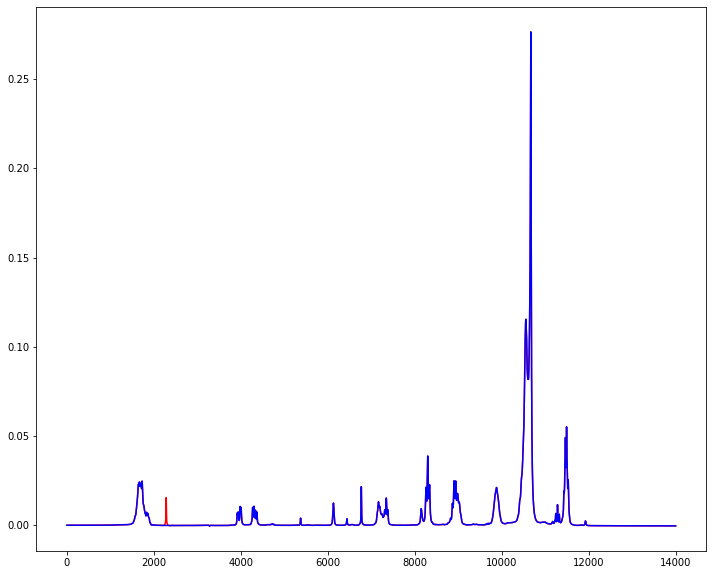

In [291]:
## Check if signal has been added

plt.plot(test_t2[0],color='r')
plt.plot(test[0],color='b')

In [285]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_test_t2 = model.predict(test_t2)

1/1 [==============================] - 0s 52ms/step


In [286]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_test_t2[0][i])

Tg 0.29196435 0.29297745
TC 0.07152259 0.06926241
TPL 0.05971506 0.056354374
TFA 0.28032413 0.27901745
PUFA 0.311462 0.30953217
MUFA 0.13170338 0.13263196
SFA 0.24342021 0.24267852
Om3 0.308649 0.3022859
Om6 0.2767721 0.27593932
Om9 0.13357261 0.13396488
LA 0.2738421 0.27313587
DHA 0.46021473 0.4597645
PC -0.009655836 -0.009897576
PE 0.094637744 0.0887585
FC 0.033471137 0.03468948
EC 0.089977905 0.085860856
LPC 0.27476555 0.27107534
SM -0.0040011164 -0.0067428155


In [287]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_test_t2[1][i])

Tg 0.23300442 0.23402736
TC 0.12822321 0.12597264
TPL 0.12595816 0.12258925
TFA 0.24369416 0.2423878
PUFA 0.26677302 0.26477692
MUFA 0.11583736 0.11679844
SFA 0.21460745 0.21389005
Om3 0.28844422 0.28188512
Om6 0.22965826 0.22878788
Om9 0.11765443 0.11808178
LA 0.22477065 0.22403036
DHA 0.36383867 0.3633778
PC 0.06819336 0.06803306
PE 0.18438822 0.17847466
FC 0.084164165 0.08547723
EC 0.13821171 0.13401134
LPC 0.09317114 0.08897145
SM -0.011440155 -0.014175155


In [292]:
# Add all interference signals to each experimental lipid mixture
test_t_All = test.copy()
for i in np.arange(11):
    TMS[13350:13525] = TMS[13350:13525] - (TMS[13350:13525].min() - test[i][:1000].mean())
    MTBE[6355:6385] = MTBE[6355:6385] - (MTBE[6355:6385].min() - test[i][:1000].mean())
    MTBE[10775:10800] = MTBE[10775:10800] - (MTBE[10775:10800].min() - test[i][:1000].mean())
    t[7500:7675] = t[7500:7675] - (t[7500:7675].min() - test[i][:1000].mean())
    t2[2200:2375] = t2[2200:2375] - (t2[2200:2375].min() - test[i][:1000].mean())
    test_t_All[i] = test_t[i]+ t + t2 + TMS + Water + MTBE

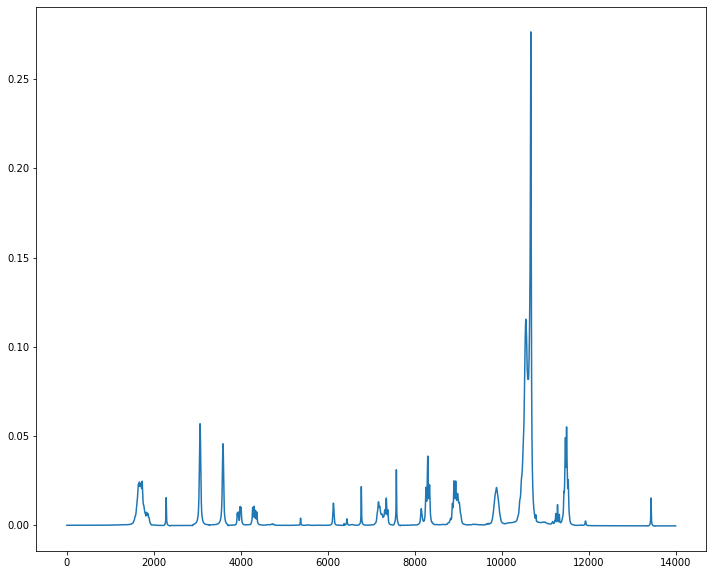

In [293]:
plt.plot(test_t_All[0])

In [294]:
ypred = model.predict((test_t_All))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()

rmse = np.sqrt(((ypred - TestLipProfiles) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))

1/1 [==============================] - 0s 48ms/step
Tg 0.7
TC 1.13
TPL 0.69
TFA 6.06
PUFA 4.66
MUFA 2.32
SFA 2.75
Om3 1.85
Om6 2.91
Om9 3.54
LA 4.07
DHA 0.5
PC 0.95
PE 0.63
FC 2.12
EC 1.07
LPC 0.87
SM 0.21
Overall RMSE:  2.056


In [295]:
ypred = model.predict((test_t_All))


rmse = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))

1/1 [==============================] - 0s 47ms/step
Tg 0.01
TC 0.06
TPL 0.04
TFA 0.02
PUFA 0.05
MUFA 0.02
SFA 0.03
Om3 0.08
Om6 0.03
Om9 0.03
LA 0.05
DHA 0.04
PC 0.08
PE 0.08
FC 0.22
EC 0.09
LPC 0.43
SM 0.07
Overall RMSE:  0.079


## Some similar calculations for CRAFT (RMSE and MAPE)

In [237]:
os.chdir("/home/htjhnson/Downloads/DL_NMR")

In [238]:
LipListCRAFT2 = ['Tg','TC','TFA','PUFA','MUFA','SFA','Om3','LA','DHA','PC','PE','LPC','SM']

In [ ]:
TestLipProfiles2_CRAFT = pd.read_excel('DL_LipMix_LipidProfiles_ByCRAFT_More.xlsx', index_col=0)
TestLipProfiles2_deconv = pd.read_excel('DL_LipMix_LipidProfiles_ByDeconv.xlsx', index_col=0)


#
TestLipProfiles2_CRAFT = np.array(TestLipProfiles2_CRAFT)
TestLipProfiles2_deconv = np.array(TestLipProfiles2_deconv)

In [ ]:
TestLipProfiles_ForCRAFTCompare = TestLipProfiles.copy()

TestLipProfiles_ForCRAFTCompare = np.delete(TestLipProfiles_ForCRAFTCompare,2, 1)
TestLipProfiles_ForCRAFTCompare = np.delete(TestLipProfiles_ForCRAFTCompare,7, 1)
TestLipProfiles_ForCRAFTCompare = np.delete(TestLipProfiles_ForCRAFTCompare,7, 1)
TestLipProfiles_ForCRAFTCompare = np.delete(TestLipProfiles_ForCRAFTCompare,11, 1)
TestLipProfiles_ForCRAFTCompare = np.delete(TestLipProfiles_ForCRAFTCompare,11, 1)

In [ ]:
np.shape(TestLipProfiles_ForCRAFTCompare)

In [ ]:
np.shape(TestLipProfiles2_CRAFT)

In [ ]:
for i in np.arange(13):
    print(LipListCRAFT2[i],TestLipProfiles_ForCRAFTCompare[0,i])

In [ ]:
TestLipProfiles_ForCRAFTCompare[:,0]

In [ ]:
TestLipProfiles2_CRAFT[:,0]

In [ ]:
## Mean percent error for first 11 lipid groups
mpe1 = (abs(TestLipProfiles_ForCRAFTCompare[:,:11] - TestLipProfiles2_CRAFT[:,:11])/TestLipProfiles_ForCRAFTCompare[:,:11]).mean(axis=0)*100

## Mean percent error for last 2 lipid groups (separated as they are only in included in the last three experimental spectra)
mpe2 = (abs(TestLipProfiles_ForCRAFTCompare[8:,11:] - TestLipProfiles2_CRAFT[8:,11:])/TestLipProfiles_ForCRAFTCompare[8:,11:]).mean(axis=0)*100

## Join 13 lipids into the same list and print mean percent error for each lipid group quantified
mpe_all = np.concatenate((np.array(mpe1),np.array(mpe2)),axis=0)
for i in np.arange(13):
    print(LipListCRAFT2[i],mpe_all[i].round(2))
print(mpe_all.mean())

In [ ]:
## Now RMSE for CRAFT on 13 lipid parameters

rmse = np.sqrt(((TestLipProfiles2_CRAFT - TestLipProfiles_ForCRAFTCompare) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(13):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_50000ep experimental mixtures")

In [ ]:
## Recalculate RMSE after scaling all data from zero to one.

TestLipProfiles3_CRAFT = TestLipProfiles2_CRAFT.copy()
TestLipProfiles_ForCRAFTCompare2 = TestLipProfiles_ForCRAFTCompare.copy()

for i in np.arange(13):
    TestLipProfiles3_CRAFT[:,i]  = TestLipProfiles3_CRAFT[:,i]/conc[:,i].max()

for i in np.arange(13):
    TestLipProfiles_ForCRAFTCompare2[:,i]  = TestLipProfiles_ForCRAFTCompare2[:,i]/conc[:,i].max()
    
    
    
rmse = np.sqrt(((TestLipProfiles3_CRAFT - TestLipProfiles_ForCRAFTCompare2) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(13):
    print(LipList5[i],rmse[i].round(4))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(4))
print("For MLP_FftPhaRefBas_LinearCombinations_10000ep experimental mixtures")

In [ ]:
for i in np.arange(11):
    plt.plot(spec[i][6700:6850])
plt.show()
for i in np.arange(11):
    plt.plot(test[i][6700:6850])

NGR_Liver_Lipids_1__proton-1-3.fid


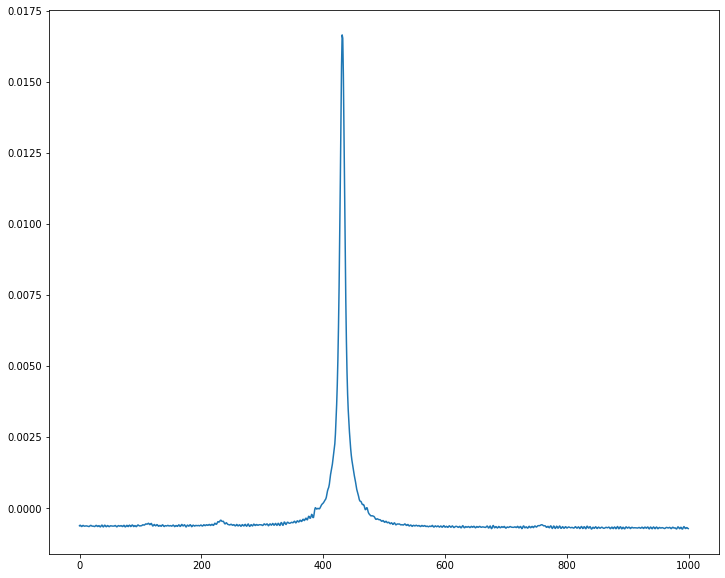

NGR_Liver_Lipid_2_PROTON-1-3.fid


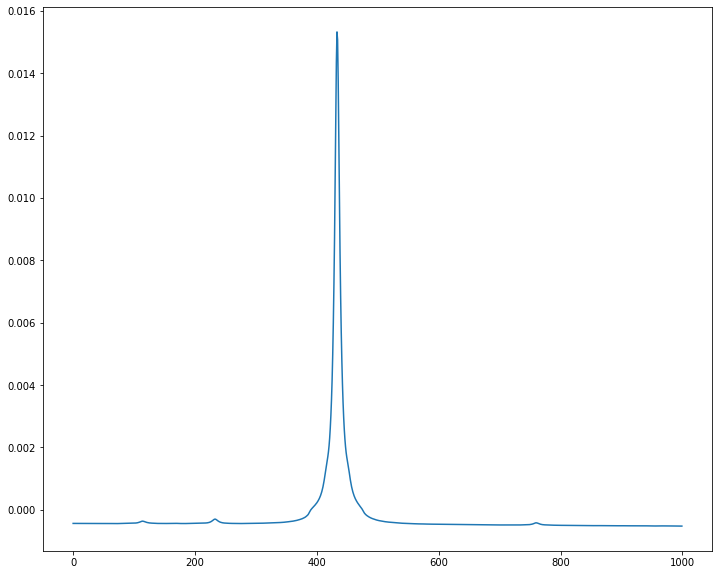

NGR_Liver_Lipids_3__proton-1-3.fid


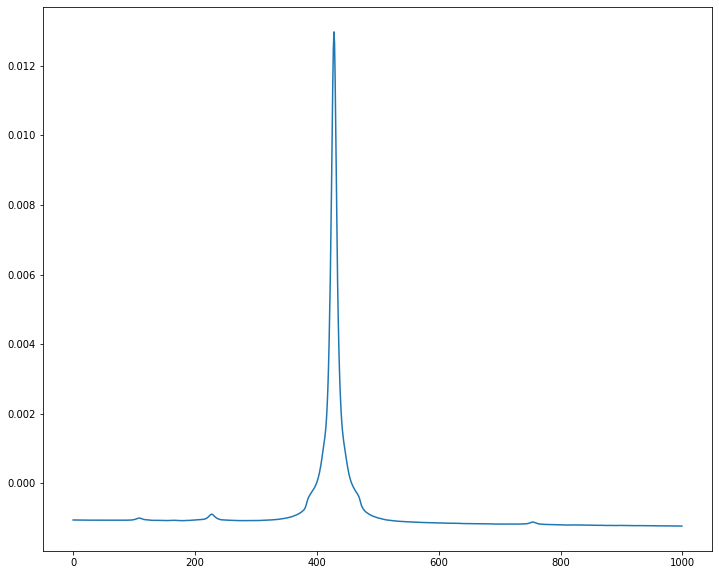

NGR_Liver_Lipid_4_second__proton-1-3.fid


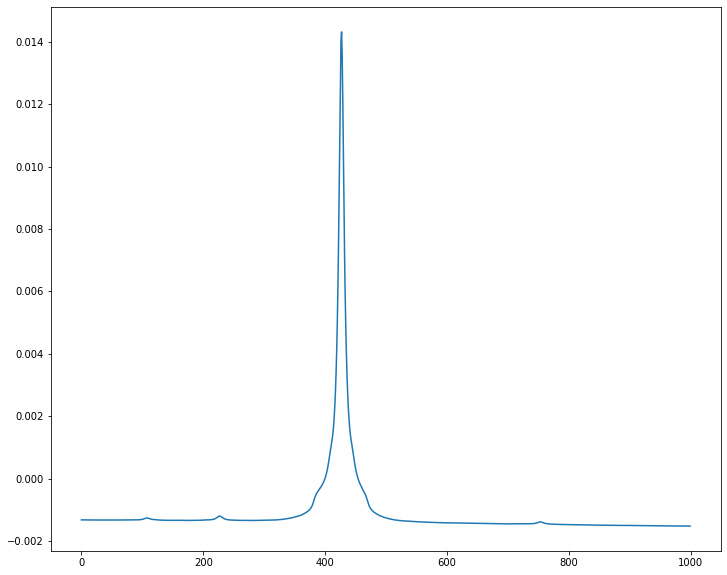

NGR_Liver_Lipid_5__PROTON-4-3.fid


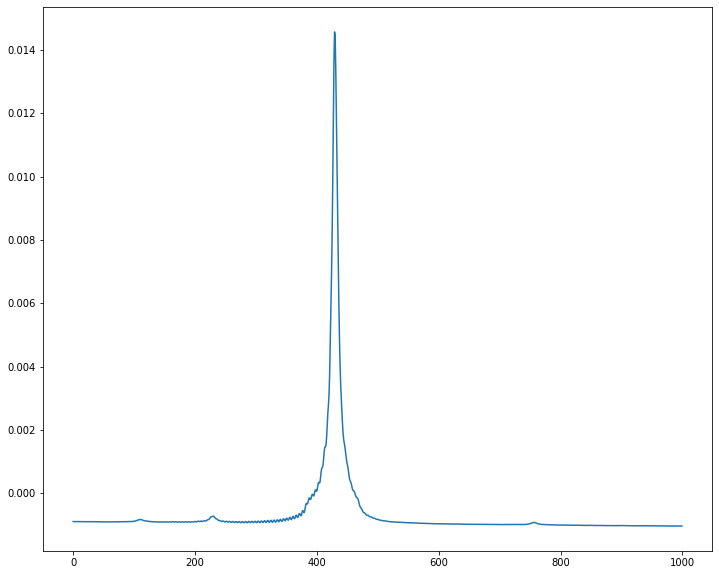

NGR_Liver_Lipids_17__proton-1-3.fid


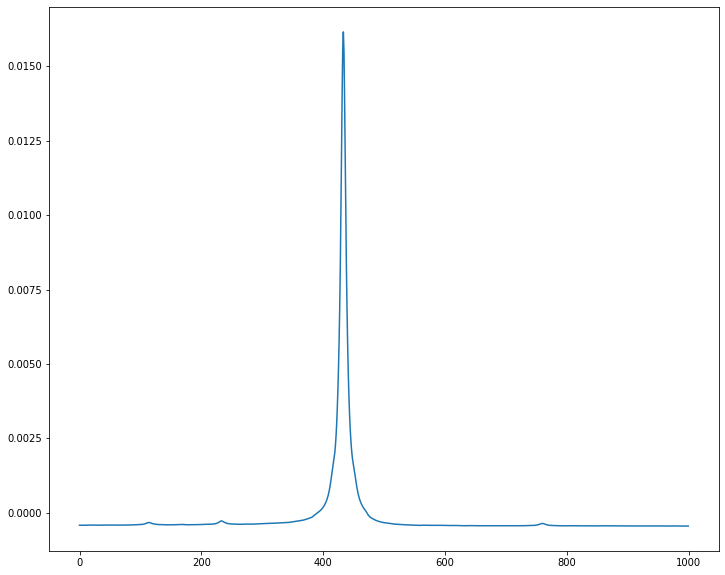

NGR_Liver_Lipids_18_PROTON-1-3.fid


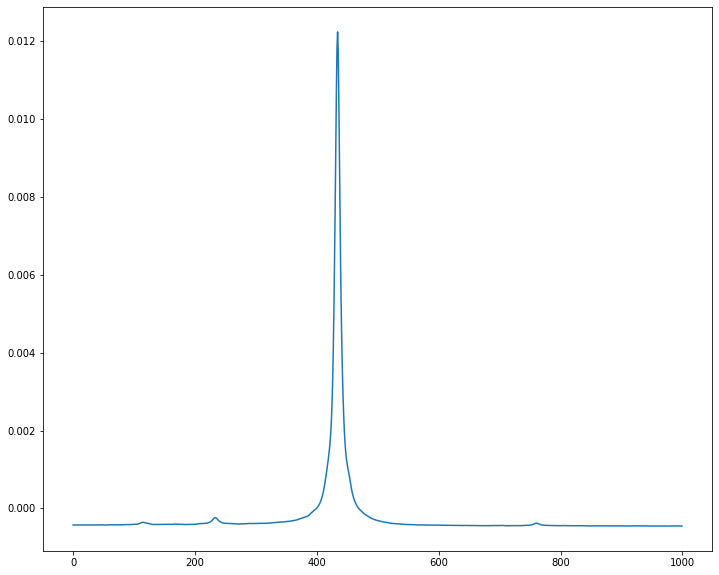

NGR_Liver_Lipid_19_PROTON-1-3.fid


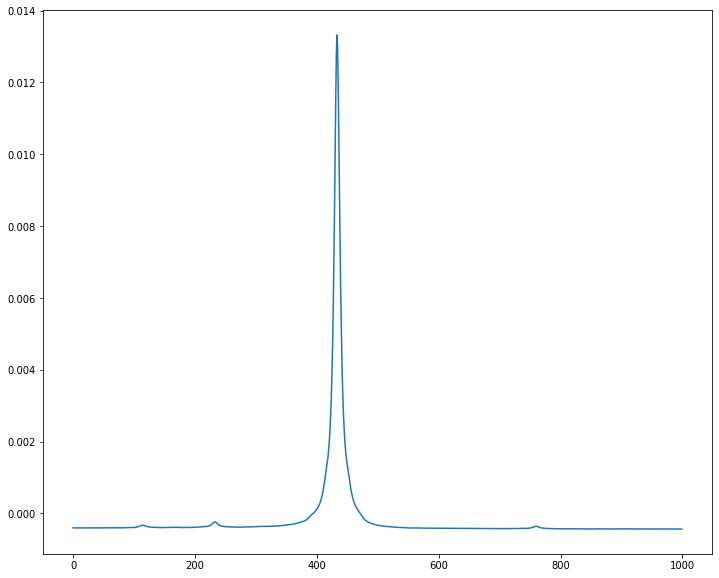

NGR_Liver_Lipid_21_second_half__proton-1-3.fid


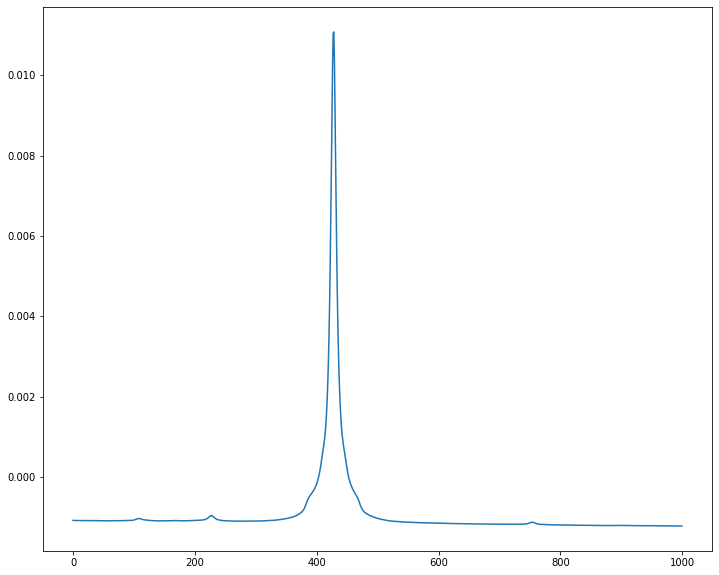

NGR_Liver_Lipids_22_proton-1-3.fid


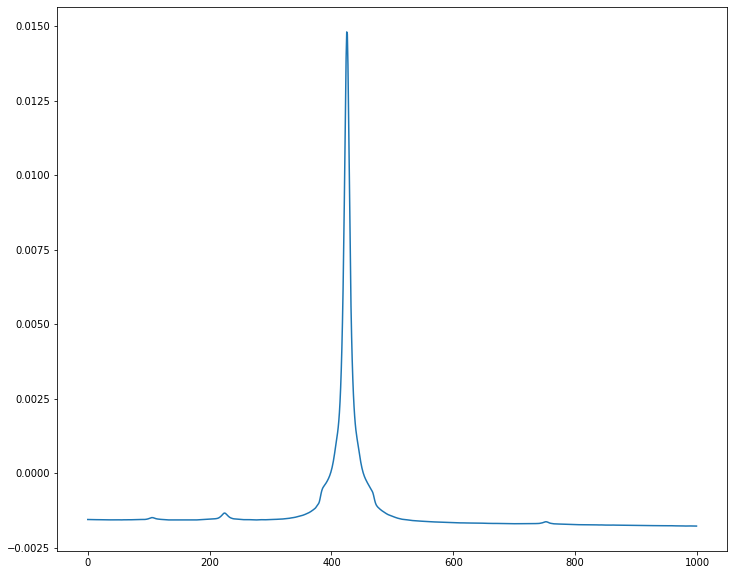

NGR_Liver_Lipids_23_PROTON-1-3.fid


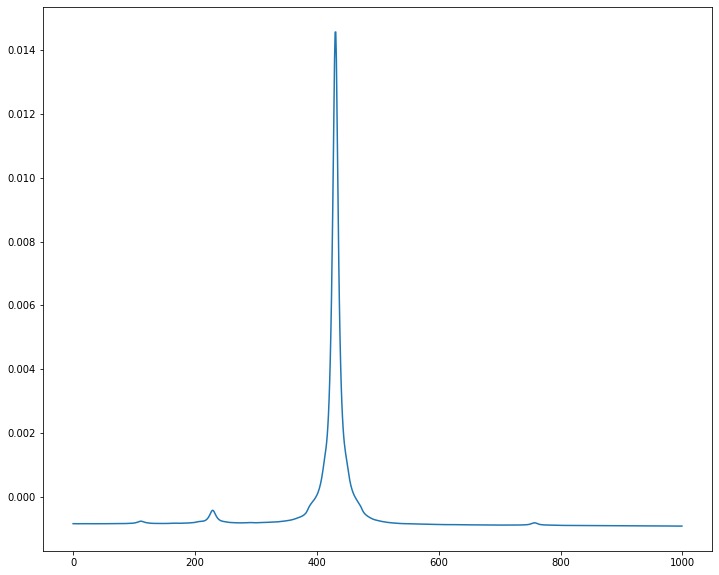

NGR_Liver_Lipid_24_4th_half__proton-1-3.fid


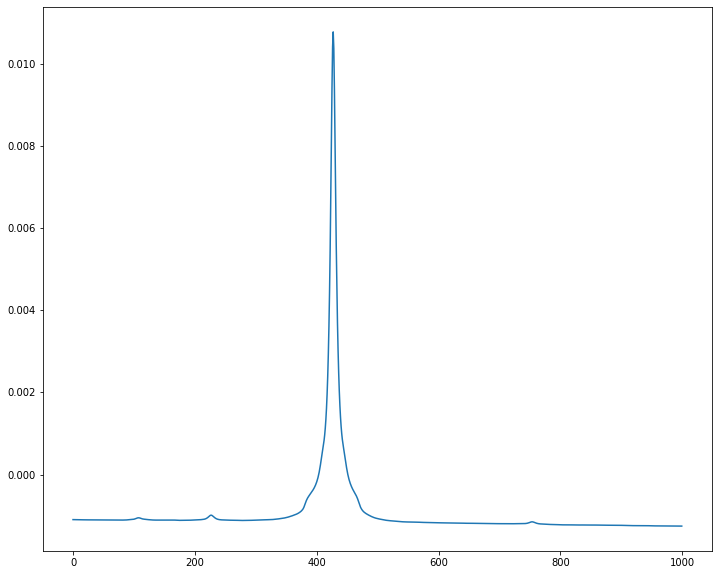

NGR_Liver_25_Lipids___proton-1-3.fid


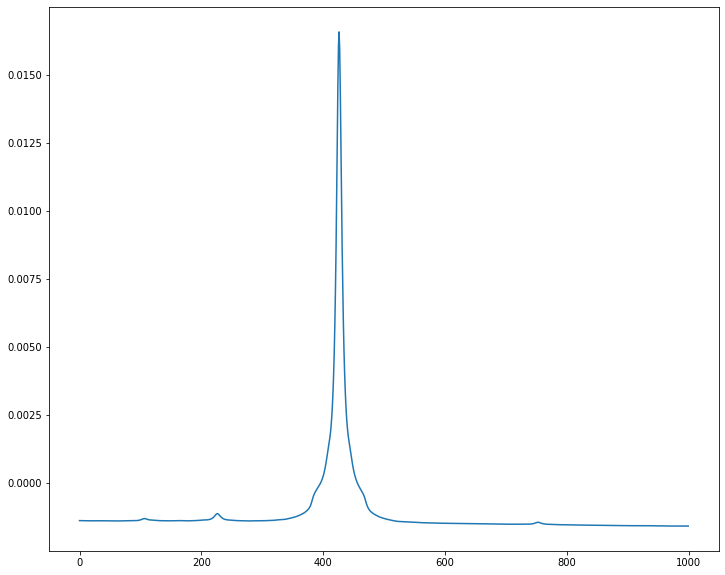

NGR_Liver_Lipids_36_PROTON-1-3.fid


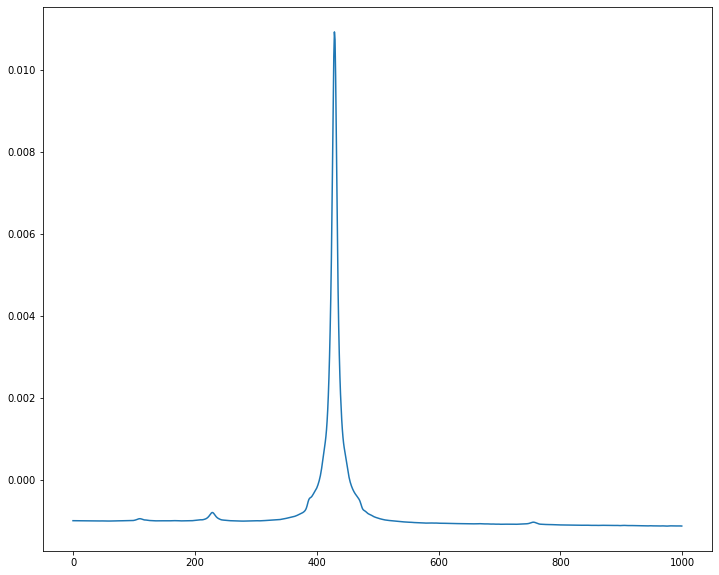

NGR_Liver_Lipids_37_PROTON-2-3.fid


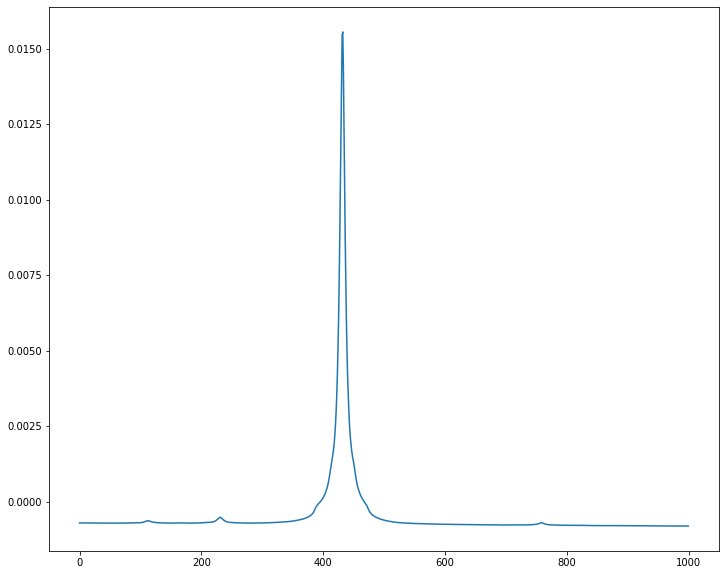

NGR_Liver_Lipids_39__proton-1-3.fid


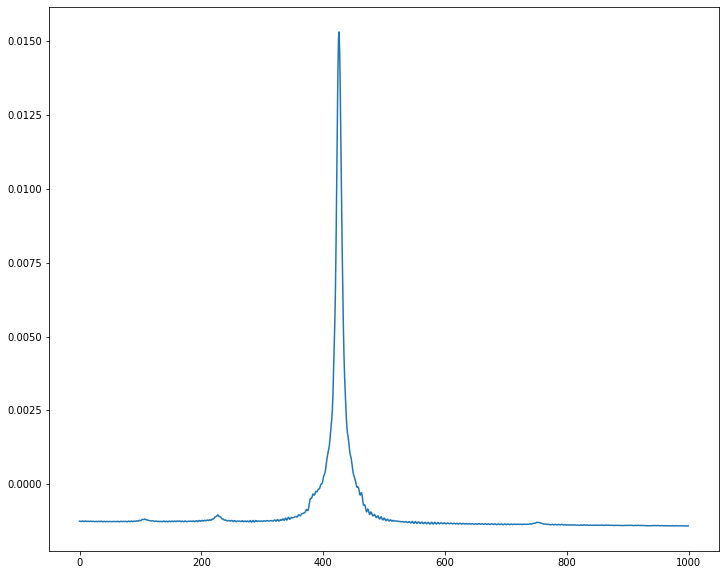

In [239]:
for i in np.arange(16):
    print(testFiles[i])
    plt.plot(LiverData[i][13000:])
    plt.show()